# Baht Coin Detection using Computer Vision

## Introduction

According to IBM : "Computer vision is a field of artificial intelligence (AI) that uses machine learning and neural networks to teach computers and systems to derive meaningful information from digital images, videos and other visual inputs—and to make recommendations or take actions when they see defects or issues."

For a computer and image is just a matrix of pixels. If we consider the RGB format that each pixel is a tuple of three value ranging from 0 to 255, each representing one of the fundamental colors. Humans are very good to analyze images and extract miningfull informations from them. Let's say we have a bunch of coins dispached on a table. It takes us a fraction of a second to distinguish each coins from the background. Computer can't see the same way we do. computer can use convolution layers to extract features usefull for object recognition such as edges for exemple. Let's take a look at what it looks like with different simple kernel :

In [24]:
%matplotlib inline

In [ ]:
import ultralytics
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

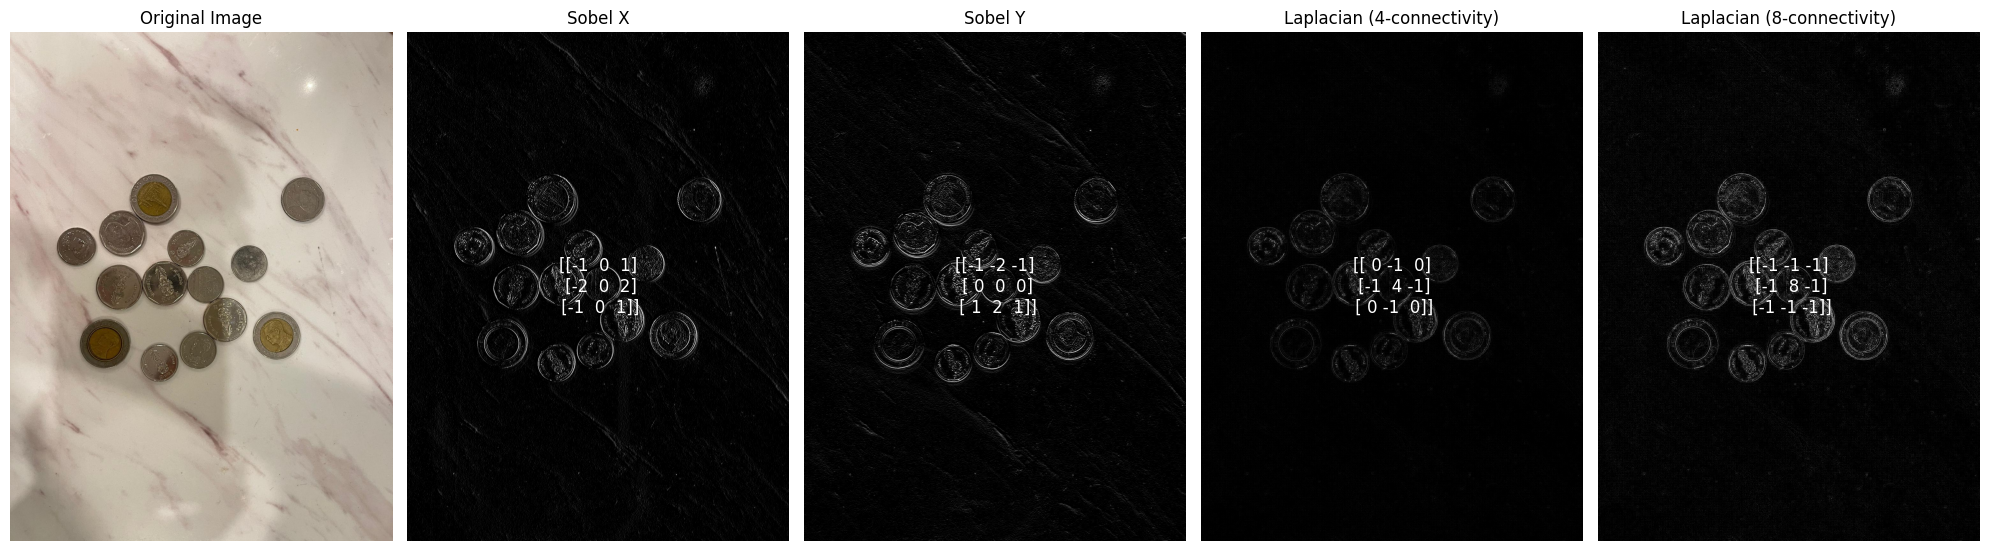

In [ ]:
def display_image_with_kernels(image_path):
    # Load the image using Pillow
    original_image = Image.open(image_path)
    open_cv_image = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2BGR)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)

    # Define the kernels
    sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    laplacian_4_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    laplacian_8_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    # Apply Sobel filter in x and y directions
    sobel_x = cv2.filter2D(gray_image, -1, sobel_x_kernel)
    sobel_y = cv2.filter2D(gray_image, -1, sobel_y_kernel)

    # Apply Laplacian filter
    laplacian_4 = cv2.filter2D(gray_image, -1, laplacian_4_kernel)
    laplacian_8 = cv2.filter2D(gray_image, -1, laplacian_8_kernel)

    # Set up the plot
    fig, axes = plt.subplots(1, 5, figsize=(20, 6))
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(sobel_x, cmap="gray")
    axes[1].set_title("Sobel X")
    axes[1].axis("off")
    axes[1].text(0.5, 0.5, str(sobel_x_kernel), color='white', fontsize=12, ha='center', va='center', transform=axes[1].transAxes)

    axes[2].imshow(sobel_y, cmap="gray")
    axes[2].set_title("Sobel Y")
    axes[2].axis("off")
    axes[2].text(0.5, 0.5, str(sobel_y_kernel), color='white', fontsize=12, ha='center', va='center', transform=axes[2].transAxes)

    axes[3].imshow(laplacian_4, cmap="gray")
    axes[3].set_title("Laplacian (4-connectivity)")
    axes[3].axis("off")
    axes[3].text(0.5, 0.5, str(laplacian_4_kernel), color='white', fontsize=12, ha='center', va='center', transform=axes[3].transAxes)

    axes[4].imshow(laplacian_8, cmap="gray")
    axes[4].set_title("Laplacian (8-connectivity)")
    axes[4].axis("off")
    axes[4].text(0.5, 0.5, str(laplacian_8_kernel), color='white', fontsize=12, ha='center', va='center', transform=axes[4].transAxes)

    plt.tight_layout()

# Example usage
display_image_with_kernels('test_YOLO2.jpg')


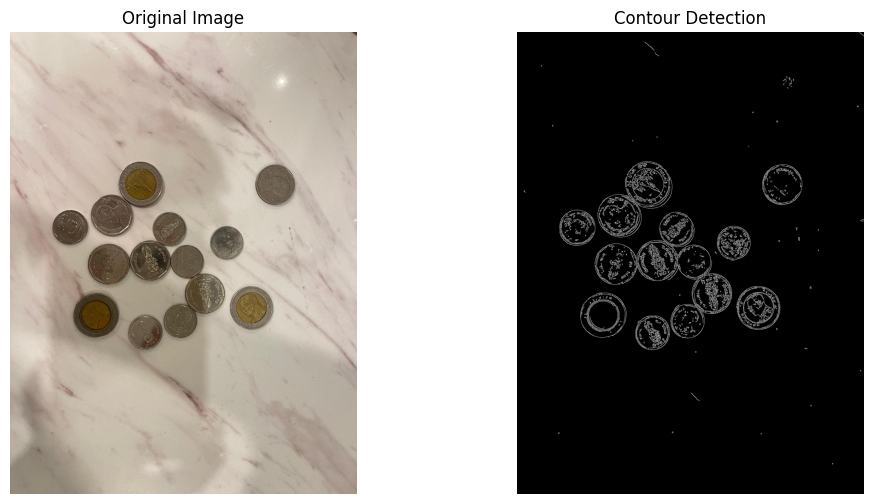

In [ ]:
def display_image_with_contour(image_path):
    original_image = Image.open(image_path)
    gray_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY)
    contour_image = cv2.Canny(gray_image, threshold1=100, threshold2=200)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(contour_image, cmap="gray")
    axes[1].set_title("Contour Detection")
    axes[1].axis("off")
display_image_with_contour("test_YOLO2.jpg")

Here is Canny Edge Detection algorithm which uses a combination of kernel and other enginnering technique for better edge detection :
1. Noise Reduction (Gaussian Blur).
2. Gradient Calculation (Sobel X and Y, Gradient Magnitude and Direction).
3. Non-Maximum Suppression (Thinning edges).
4. Double Thresholding (Classify edges as strong, weak, or non-edge).
5. Edge Tracking by Hysteresis (Retain only relevant edges).

## Project Overview

During my exchange program in Thailand (2024), I noticed how hard it was to spend my coins. While buying groceries, I always received a lot of coins as change. I rarely spent them as most of my expenses were higher than 20 baht, which is the smallest banknote available. I ended up stacking coins on my desk, especially one baht coins, and the pile kept growing. It made me uncomfortable to pay for a meal with a handful of coins and to force the cashier to count them all. Some big stores have automatic cashiers and machines to automatically count coins, but those are expensive devices which are not suitable for most shops and Thai street food restaurants. Imagine being able to spread coins on the counter, take a picture, and get the total baht value! This is the goal I aim to achieve for this project. Even though I found models online that claim to have a 90% precision in classifying baht coins, I think they are overfitting. Indeed, the results I got testing the different models with my own pictures were around 40%. Moreover they used to much data augmentation to have miningfull results. Of course, if my model doesn't have good enough precision, it won't be usable in practice. I'm pretty confident that coin detection will work well. As cashiers sort coins into different boxes during the day, the model could count each of them. Instead of counting hundreds of coins, the cashier will only have to multiply the number of coins by their value.

Baht coins are very hard to identify has the 1,2 and 5 baht coins look very similiar. Each one of them as the current or previous king's face on one side which make the disction very hard. On the tail's side 2 different things can be represented per coin. Those are the same for the 1 and 5 baht coin and they share one with 2 baht and 10 baht coins. 2 baht coin can even be composed of two different colors.  baht coins can be identify thanks to their hexagonal shape but from distance, once the image compressed, those details are no longer noticeable.   People usually refers on extra informations such as size, comparaison or the possibility to flip the coin to be sure of its value. A model can't obviously do that last technique. It can neither rely on the coins' size as scale can't be captured. For all of those reasons we expect that the model will strugle to differeciate 1,2 and 5 baht coins, especially from distance. Grey 2 baht coins are very rare and therefore I won't have enough data to recognize them well from others coins. Moreover they loke exactly like 1 baht coins depending on the head's side.

![Baht Coins](https://github.com/RomainCuchet/CoinsAI/blob/main/report_images/baht_coins.jpg?raw=1)

I first tried to train a faster R-CNN network, which made me realize multiple things that I will explain later on. This trial made me realize that my ASUS Vivobook was nowhere close to meeting the requirements to train a big network. My laptop has an Intel® Iris® Xe GPU, which can't be used to train the model. The reason is that PyTorch only supports CUDA architecture, which is NVIDIA-specific. As a result, the model is trained on my Intel® Core™ i7. CPUs are not suitable for machine learning as they are designed for sequential processing, have lower memory bandwidth, and the list goes on. I tried to train the faster R-CNN model on it and had to stop the training. The reason is that after 2 hours of calculations, I didn't finish the first epoch, and the dataset was less than 10,000 images long. I switched to Google Colab and their free T4 GPU plan. I succeeded in completing the 10-epoch long training in 52 minutes but used all the free plan credits. This is not enough, and I had to subscribe to get access to an A100 GPU.ed all the free plan credits. This is not enough and I had to suscribe to get access to a A100 GPU.

Tools and code not present in this notebook are availbale on my github : https://github.com/RomainCuchet

# R-CNN

R-CNN (Region-based Convolutional Neural Network) is a deep learning architecture that combines region proposals with convolutional neural networks. The region proposal layer returns bounding boxes that are likely to contain objects. Then a CNN (Convolutional Neural Network) operates features extraction and return an output feature vector for every region. After that an SVM (Support Vector Machine) determine wether or not a region belong to one specific categorie using a one-vs-all SVM classifiers. To finish a bounding box regressor is applied to better fit the object. To sum up the R-CNN pipeline is the folowwing :
1. Input
2. Region Proposal (Selective Search)
3. Feature Extraction (CNN)
4. Classification (SVM for each class)
5. Bounding Box Refinement (Bounding box regression)
6. Output

## Fist trial

For the first training of my model I made severall mistakes. First I didn't understand that R-CNN network has it's own image preprocessing pipeline. As I knew every image should match the chosen input layeer's size I resized it using 'torchvision.transforms.Resize(128,128)'. The issue is that proportion are not preserved which increases complexity to extract miningfull data geometrical shapes. As faster R-CNN relies on a RPN (Region Proposal Network) to extract intresting areas in the image it doesn't need a fixed sized input layer. Therefore the preprocessing pipeline resizes the image according to the biggest edge to make it fit within a specific range and preserve ratio on the resized image. Due to computational limitations I also picked a way too little size for the input layer (128*128). Due to resizing most pixel where lost and coins could no longer be differenciate, even for a human.

To train this model I used the following dataset : https://universe.roboflow.com/thaibank/thaibath-detection/dataset/3

In [ ]:
def display_original_and_resized(image_path, new_size=(128, 128)):
    original_image = Image.open(image_path)
    resized_image = original_image.resize(new_size)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(resized_image)
    axes[1].set_title(f"Resized Image ({new_size[0]}x{new_size[1]})")
    axes[1].axis("off")

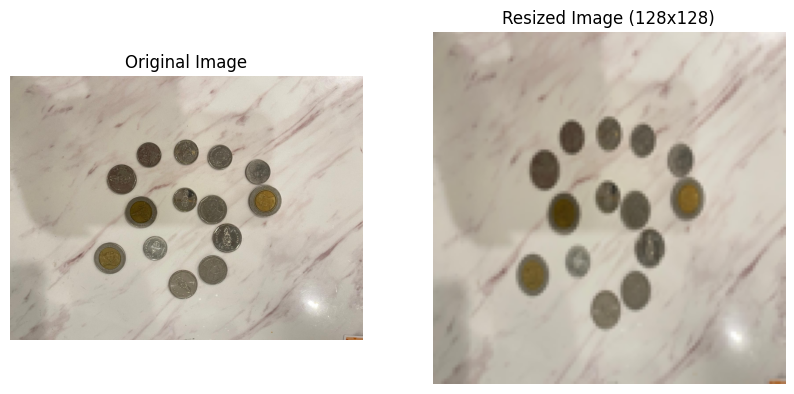

In [ ]:
display_original_and_resized("C:/Users/romai/OneDrive - De Vinci/Bureau/CoinsAI/baht_dataset_horizontal/images/5de2f823-baht_d8.jpg")

An other mistake I made is making all the calculations to resize box according to the new image dimensions despite the fact that the model already does it. I trained a pretrained model for 10 epoch, with an input layer of 128 by 128 and a frozen backbone. Here is the result :

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torchvision.transforms as T
import torch
from PIL import Image,ImageDraw

def show_result(image_path, predictions, config, confidence_threshold):
    # Open the original image
    original_image = Image.open(image_path)
    original_width, original_height = original_image.size

    # Calculate resizing factors for width and height
    scale_x = original_width / config.img_width
    scale_y = original_height / config.img_height

    draw = ImageDraw.Draw(original_image)

    # Extract labels, bounding boxes, and scores from predictions
    labels = predictions[0]['labels'].tolist()
    scores = predictions[0]['scores'].tolist()
    labels = [str(l) for l in labels]

    # Adjust and draw bounding boxes
    n = 0
    for i, (box, score) in enumerate(zip(predictions[0]['boxes'], scores)):
        if score >= confidence_threshold:
            n += 1
            xmin, ymin, xmax, ymax = box

            # Scale the bounding box coordinates
            xmin = int(xmin * scale_x)
            ymin = int(ymin * scale_y)
            xmax = int(xmax * scale_x)
            ymax = int(ymax * scale_y)

            colors = ["blue", "green", "red", "yellow", "purple", "orange"]
            color = colors[i % len(colors)]
            draw.rectangle([xmin, ymin, xmax, ymax], outline=color, width=3)

    print(n, "objects detected with confidence level higher than", confidence_threshold)

    plt.imshow(original_image)
    plt.axis('off')

class Config:
    def __init__(self):
        self.num_epochs = 10
        self.unfrezed_epoch = 15
        self.img_width = 128
        self.img_height = 128

def rcnn_prediction(config,image_path,confidence_threshold=0.5,model_path="models/dummy_faster_rcnn.pth"):
    config = Config()
    num_class = 4 + 1 # Add 1 for the background class
    model = fasterrcnn_resnet50_fpn(num_classes=num_class)
    model.load_state_dict(torch.load(model_path,map_location=torch.device('cpu'))) # cpu due to my hardware limitations
    model.eval()

    transform = T.Compose([
        T.Resize((128, 128)),
        T.ToTensor(),
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image)
    image = image.unsqueeze(0)

    with torch.no_grad():
        predictions = model(image)

    show_result(image_path,predictions,config,confidence_threshold=confidence_threshold)

In [ ]:
config_rcnn = Config()

30 objects detected with confidence level higher than 0.1


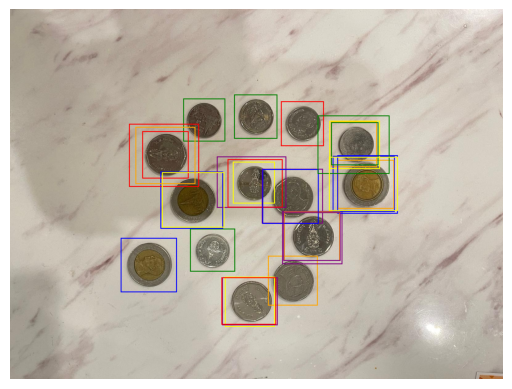

In [ ]:
rcnn_prediction(config_rcnn,confidence_threshold=0.1,image_path="baht_dataset_horizontal/images/5de2f823-baht_d8.jpg")

We notice that all the bounding boxs contain a coin which is a good result. Multiple bounding box contain the same object which could be corrected using non max supression.

14 objects detected with confidence level higher than 0.5


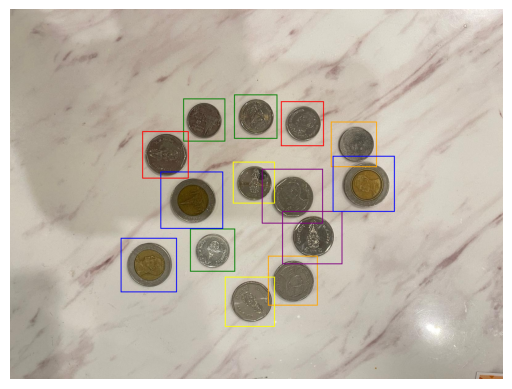

In [ ]:
rcnn_prediction(config_rcnn,confidence_threshold=0.5,image_path="baht_dataset_horizontal/images/5de2f823-baht_d8.jpg")

By increasing the confidence level treshold we get rid of most of the bounding box and only one per coin remain. This is very promising as our dummy model succeded to count the number of coin on the image on this particular exemple. The model classified correctly all of the 10 baht coin. It means that the 10 baht coin SVM should be already quite performant. For the other coins the result as very bad.

We didn't saved the performance of our model and won't spend time running the test again as based on the previous example we can tell that the model has a very low accuracy.

## Dataset Processing

Jupyther notebook are not very suitable when it comes to import different class from other files that are regularely updated. This is why we processed it outside of this notebook. We will provide at the end all the code used to process the dataset.   

I labelled 1655 bounding boxs on 54 images to constitute my dataset. For obvious reason I couldn't spent more than severall hours to labbel each of them by hand. I used roboflow to do the data augmentation process.

The following augmentation was applied to create 3 versions of each source image:
* 50% probability of horizontal flip
* Equal probability of one of the following 90-degree rotations: none, clockwise, counter-clockwise
* Random rotation of between -15 and +15 degrees
* Random shear of between -10° to +10° horizontally and -10° to +10° vertically
* Random brigthness adjustment of between -15 and +15 percent
* Random Gaussian blur of between 0 and 1 pixels
* Salt and pepper noise was applied to 0.1 percent of pixels

beeing limited to 3 images I did it a second time with the original dataset.

The following augmentation was applied to create 3 versions of each source image:
* Equal probability of one of the following 90-degree rotations: none, clockwise, counter-clockwise
* Random rotation of between -15 and +15 degrees
* Random shear of between -10° to +10° horizontally and -10° to +10° vertically
* Random brigthness adjustment of between -15 and +15 percent
* Random exposure adjustment of between -10 and +10 percent
* Random Gaussian blur of between 0 and 1.4 pixels
* Salt and pepper noise was applied to 0.1 percent of pixels

I then merged the two datasets. resulting in the following one :

|              | Images | Bounding Boxes |
|-----------------|--------|----------------|
| **Train**       |  228   |      7575      |
| **Validation**  |   22  |       557      |
| **Test**        |   10   |       225      |


I decided not to pick datasets found online as they are filled with bias and the images are in very low quality. The annouced performance are 95% but based on personal tests it was lower than 30% with new images. They did data augmentation with a factor of around 20 images per original one on a small dataset resulting in a overfitting model that appear to perform very well but only on this specific dataset. Those dataset are better for bank notes but this isn't my subject.

Has coin are disk all bounding box can be squared and angle isn't relevant. Therefore we chose to use regular YOLOv8 format instead of the Oriented Bounding Box one to enhance speed.  


# YOLO

In [ ]:
model = YOLO("models/yolov8n.pt")

Let's run the pretrained Yolo model on our coins :


0: 640x512 17 bowls, 2 oranges, 1 dining table, 187.3ms
Speed: 4.1ms preprocess, 187.3ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


(np.float64(-0.5), np.float64(3471.5), np.float64(4623.5), np.float64(-0.5))

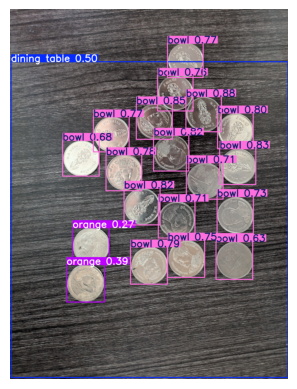

In [ ]:
image_path = 'report_images/test_YOLO1.jpg'
img = cv2.imread(image_path)
results = model(img)
annotated_img = results[0].plot()
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')


0: 640x480 (no detections), 192.9ms
Speed: 0.0ms preprocess, 192.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


(np.float64(-0.5), np.float64(1199.5), np.float64(1599.5), np.float64(-0.5))

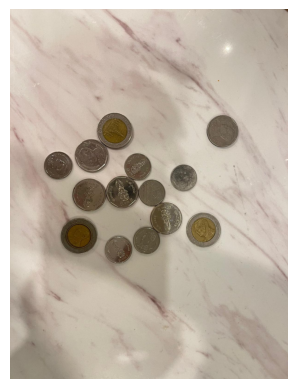

In [ ]:
image_path = 'report_images/test_YOLO2.jpg'
img = cv2.imread(image_path)
results = model(img)
annotated_img = results[0].plot()
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

The results are intriguing. To the human eye, the two images appear very similar, making it easy to recognize the coins. Since "coins" isn't a labeled class used to train the YOLO model, it’s expected that no coins are detected. However, it's surprising that the model identifies zero objects in the second image but detects 19 round objects in the first.

My hypothesis is that the slight angle and higher brightness in the first photograph create a sense of depth, making the coins appear three-dimensional to the model. In contrast, in the second image, the coins appear flat, resembling simple disks, which likely reduces the model’s confidence in detecting them.

The most fascinating part of this result is that, if we interpret the detected "bowls" and "oranges" as coins, the model effectively identifies 17 bowls and 2 oranges, totaling 19—exactly the correct count of coins. This suggests that the model even manages to differentiate the background, providing an interesting indication of how it processes shape and lighting cues.

In [ ]:
model2 = YOLO("models/yolov8s.pt")


0: 640x512 7 cups, 9 oranges, 2 cakes, 1 dining table, 263.2ms
Speed: 0.0ms preprocess, 263.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


(np.float64(-0.5), np.float64(3471.5), np.float64(4623.5), np.float64(-0.5))

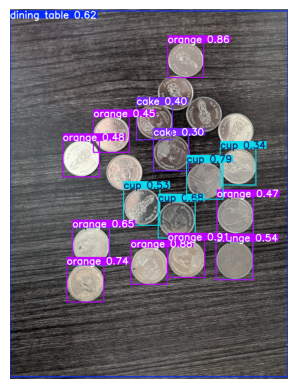

In [ ]:
image_path = 'report_images/test_YOLO1.jpg'
img = cv2.imread(image_path)
results = model2(img)
annotated_img = results[0].plot()
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')


0: 640x480 2 donuts, 1 cake, 260.5ms
Speed: 1.7ms preprocess, 260.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


(np.float64(-0.5), np.float64(1199.5), np.float64(1599.5), np.float64(-0.5))

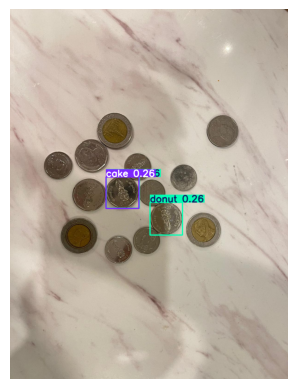

In [ ]:
image_path = 'report_images/test_YOLO2.jpg'
img = cv2.imread(image_path)
results = model2(img)
annotated_img = results[0].plot()
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

In our initial training of the Faster R-CNN model, we identified several issues. First, the Resize function we used did not preserve the aspect ratio. As a result, when training on images with varying original dimensions (as in our dataset), the model struggled to extract meaningful geometric features. The YOLOv8 preprocessing pipeline, in contrast, preserves aspect ratio by combining padding and resizing, which helps maintain image consistency. Additionally, YOLOv8 benefits from a larger input layer, which aids in better feature extraction.

Through research, I determined that YOLOv8s (the "s" stands for "small") is the most suitable model for our use case. It offers an effective balance of speed and accuracy and is feasible to train using the computing power available with my Colab subscription.

### YOLOv8n Fine-tuning

As already mentionned I will use gogle colab and it's A100 GPU to finetune my model.

| Model   | Size (pixels) | mAPval50-95 | Speed CPU ONNX (ms) | Speed A100 TensorRT (ms) | Params (M) | FLOPs (B) |
|---------|---------------|-------------|----------------------|--------------------------|------------|-----------|
| YOLOv8n | 640           | 37.3        | 80.4                 | 0.9                      | 3.2        | 8.7       |
| YOLOv8s | 640           | 44.9        | 128.4                | 1.2                      | 11.2       | 28.6      |
| YOLOv8m | 640           | 50.2        | 234.7                | 1.8                      | 25.9       | 78.9      |
| YOLOv8l | 640           | 52.9        | 375.2                | 2.3                      | 43.7       | 165.2     |
| YOLOv8x | 640           | 53.9        | 479.1                | 3.5                      | 68.3       | 275.8     |

I first tried to train YOLOv8s with a batch of 32 and an image size of 1280. The training exeded the 40 GB of ram accessible on the A100 GPU. After some test I concluded that I will use a YOLOv8n model with a batch size to 16, an image size of 640 pixels and 16-bit half-precision floating points.

> ⚠️ **Warning:** Do not run this notebook on your personal computer as available ressources won't be enough to run it. All training steps are not in this notebook. As a result some file won't exists in your google drive.


The google colab environnement can't access my computer's storage by default. It would be possible to authorize access but the easiest way is to connect a google drive using OAuth.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
folder_path = '/content/drive/MyDrive/CoinAi'
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 55.5 MB/s eta 0:00:00


Let's import a pretrained YOLO model.

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 173MB/s]


In [ ]:
model.train(
    data=os.path.join(folder_path,"baht_own_dataset_augmented_merged/data.yaml"),
    epochs=100,
    imgsz=640,
    batch=16,
    lr0=0.001,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    save=True,
    name="yolov8n_baht",
    project=os.path.join(folder_path,"yolo2_results"),
    half=True
)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/CoinAi/yolo2_results, name=yolov8s_finetuned, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

train: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/labels.cache... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.172b89f06fcd62e1efb509fa988c65c9.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.32a21b1950244643a9f5295b2759f040.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.5f30754f4416b294069a90bd53b330a4.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b3e93ac7a74fb0cd03fa90827f2a3448.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b4b5b82049b20e0034a50bf181f66da1.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merge


val: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/images/c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed


Plotting labels to /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      36.7G      1.285      1.104      1.126        134        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         22        556      0.817      0.822      0.898      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      30.5G      1.216     0.8154      1.074        234        640: 100%|██████████| 15/15 [00:01<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all         22        556      0.676      0.814      0.777      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      30.3G      1.261      0.777      1.087        397        640: 100%|██████████| 15/15 [00:01<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all         22        556      0.827      0.869      0.887      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      30.5G       1.17     0.7397      1.056        224        640: 100%|██████████| 15/15 [00:01<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all         22        556      0.838       0.82      0.885      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      30.6G      1.209     0.7377      1.071        178        640: 100%|██████████| 15/15 [00:01<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         22        556      0.749      0.695      0.824       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      30.6G      1.254     0.7477      1.074        235        640: 100%|██████████| 15/15 [00:01<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]

                   all         22        556      0.619      0.767      0.866      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      30.3G      1.155     0.6985      1.061        197        640: 100%|██████████| 15/15 [00:01<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all         22        556      0.821      0.904      0.926      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        31G      1.174     0.7185      1.053        127        640: 100%|██████████| 15/15 [00:01<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         22        556      0.753      0.858      0.868      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      30.1G      1.156     0.7227      1.051        436        640: 100%|██████████| 15/15 [00:01<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         22        556      0.745      0.745      0.758      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        30G      1.123     0.6548       1.05        251        640: 100%|██████████| 15/15 [00:01<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all         22        556       0.62      0.752      0.716      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      30.2G      1.203     0.6438      1.071        300        640: 100%|██████████| 15/15 [00:01<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]

                   all         22        556      0.708      0.792      0.768      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      30.4G      1.151     0.6546      1.049        350        640: 100%|██████████| 15/15 [00:01<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all         22        556      0.788      0.883      0.909       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      30.6G       1.16     0.6348      1.049        230        640: 100%|██████████| 15/15 [00:01<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         22        556      0.675      0.768      0.735      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      30.4G      1.132     0.6569      1.053        394        640: 100%|██████████| 15/15 [00:01<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all         22        556        0.7      0.876      0.784      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      30.2G      1.138     0.6565      1.037        253        640: 100%|██████████| 15/15 [00:01<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         22        556      0.758      0.854      0.827      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      30.1G      1.142     0.6164      1.039        468        640: 100%|██████████| 15/15 [00:01<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all         22        556      0.737      0.796      0.765      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      29.9G      1.094     0.5926      1.035        187        640: 100%|██████████| 15/15 [00:01<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all         22        556      0.627      0.712      0.722      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        31G      1.138     0.6209      1.041        154        640: 100%|██████████| 15/15 [00:01<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all         22        556       0.87      0.782      0.908      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      29.9G      1.149     0.6186      1.052        173        640: 100%|██████████| 15/15 [00:01<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         22        556      0.787       0.79       0.82      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      30.5G      1.152     0.6257      1.053        105        640: 100%|██████████| 15/15 [00:01<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         22        556      0.822      0.891      0.889      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      30.8G      1.122     0.5984      1.037        216        640: 100%|██████████| 15/15 [00:01<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         22        556      0.859      0.802       0.84      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      30.6G      1.068      0.579      1.014        209        640: 100%|██████████| 15/15 [00:01<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         22        556      0.817      0.682      0.909      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      30.6G      1.066     0.5698      1.015        252        640: 100%|██████████| 15/15 [00:01<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         22        556      0.916      0.935      0.943      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      30.5G      1.058     0.5804      1.023        109        640: 100%|██████████| 15/15 [00:01<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]

                   all         22        556      0.852      0.849      0.929      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      29.8G      1.019     0.5561      1.005        183        640: 100%|██████████| 15/15 [00:01<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]

                   all         22        556      0.881      0.821      0.953      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      30.5G      1.088     0.5687      1.013        471        640: 100%|██████████| 15/15 [00:01<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all         22        556      0.867      0.899      0.937      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      30.4G      1.069     0.5601      1.042        169        640: 100%|██████████| 15/15 [00:01<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all         22        556      0.881      0.857      0.912      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      30.3G      1.107     0.5568       1.04        182        640: 100%|██████████| 15/15 [00:01<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all         22        556      0.904      0.856      0.941        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      30.6G      1.102     0.5569      1.038        212        640: 100%|██████████| 15/15 [00:01<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all         22        556      0.778      0.893      0.944      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      30.1G      1.026     0.5283      1.007        403        640: 100%|██████████| 15/15 [00:01<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]

                   all         22        556      0.814      0.787      0.866      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      30.1G      1.024     0.5253      1.004        193        640: 100%|██████████| 15/15 [00:01<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         22        556      0.863       0.84       0.89      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      30.1G      1.082     0.5739      1.027        323        640: 100%|██████████| 15/15 [00:01<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         22        556      0.739      0.917      0.847      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      30.4G      1.083     0.5336      1.031        151        640: 100%|██████████| 15/15 [00:01<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         22        556      0.871      0.839      0.917      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      30.4G      1.046     0.5429      1.003        228        640: 100%|██████████| 15/15 [00:01<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         22        556      0.966      0.944      0.982      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      30.9G      1.091     0.5435      1.048        231        640: 100%|██████████| 15/15 [00:01<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all         22        556      0.892      0.959      0.966      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      30.2G      1.029     0.4914     0.9995        246        640: 100%|██████████| 15/15 [00:01<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]

                   all         22        556      0.935       0.94       0.96      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      30.4G      1.029     0.4882      1.006        197        640: 100%|██████████| 15/15 [00:01<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]

                   all         22        556      0.911      0.953      0.961      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        30G      1.043     0.5028       1.02        158        640: 100%|██████████| 15/15 [00:01<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         22        556      0.841      0.836      0.886      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      30.4G     0.9983     0.4849     0.9928        259        640: 100%|██████████| 15/15 [00:01<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all         22        556      0.885      0.854      0.923      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      30.2G      1.114     0.5274      1.044        209        640: 100%|██████████| 15/15 [00:01<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         22        556      0.891      0.872       0.93      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100        30G      1.022     0.4949      1.003        375        640: 100%|██████████| 15/15 [00:01<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all         22        556      0.897      0.841      0.901       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      30.5G     0.9778     0.5114      0.986        120        640: 100%|██████████| 15/15 [00:01<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         22        556      0.829      0.848      0.899      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      30.3G     0.9625      0.471     0.9909        248        640: 100%|██████████| 15/15 [00:01<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all         22        556      0.918      0.857      0.932      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      31.1G     0.9471     0.4752      0.977        205        640: 100%|██████████| 15/15 [00:01<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all         22        556      0.805      0.803      0.881      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100        31G     0.9565      0.484      0.982        598        640: 100%|██████████| 15/15 [00:01<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         22        556       0.75      0.763      0.849      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        30G      1.019     0.4847      1.006        312        640: 100%|██████████| 15/15 [00:01<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all         22        556      0.911      0.859      0.937      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      30.1G      0.987     0.4877     0.9968        297        640: 100%|██████████| 15/15 [00:01<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

                   all         22        556      0.851      0.871      0.847      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        30G     0.9301     0.4583     0.9793        394        640: 100%|██████████| 15/15 [00:01<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all         22        556      0.767       0.84       0.84      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      30.1G     0.9406     0.4772     0.9829        202        640: 100%|██████████| 15/15 [00:01<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]

                   all         22        556      0.838      0.752       0.86       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      30.3G      0.966     0.4759     0.9751        207        640: 100%|██████████| 15/15 [00:01<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         22        556      0.806      0.839      0.874      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        30G     0.9955     0.4628     0.9983        180        640: 100%|██████████| 15/15 [00:01<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all         22        556      0.931       0.91      0.938      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      30.6G     0.9428     0.4423     0.9808        170        640: 100%|██████████| 15/15 [00:01<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]

                   all         22        556      0.976      0.841      0.955      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      30.4G      0.971     0.4789     0.9762         79        640: 100%|██████████| 15/15 [00:01<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         22        556      0.966      0.934      0.971      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      30.7G     0.9237     0.4425     0.9596        250        640: 100%|██████████| 15/15 [00:01<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all         22        556      0.918      0.916      0.975      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      30.9G     0.9667     0.4638     0.9795        168        640: 100%|██████████| 15/15 [00:01<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all         22        556       0.89      0.892      0.961      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      30.3G     0.9504     0.4568      0.974        364        640: 100%|██████████| 15/15 [00:01<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all         22        556      0.891      0.915      0.956      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      30.4G     0.9406     0.4451     0.9804        101        640: 100%|██████████| 15/15 [00:01<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         22        556      0.879      0.903      0.965      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      30.3G     0.9032     0.4433     0.9604        258        640: 100%|██████████| 15/15 [00:01<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         22        556      0.779      0.931      0.932      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        30G     0.9466      0.441      0.979        133        640: 100%|██████████| 15/15 [00:01<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all         22        556      0.824      0.888      0.837      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      30.2G     0.9465     0.4561     0.9635        240        640: 100%|██████████| 15/15 [00:01<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         22        556      0.909      0.918      0.949      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      30.7G     0.9249     0.4506     0.9669        454        640: 100%|██████████| 15/15 [00:01<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         22        556      0.961      0.907      0.956      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      30.8G     0.9518     0.4511     0.9802        162        640: 100%|██████████| 15/15 [00:01<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all         22        556      0.906      0.946      0.966       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      30.2G     0.9045     0.4213      0.972        154        640: 100%|██████████| 15/15 [00:01<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         22        556      0.857      0.907       0.92      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      30.3G     0.9011     0.4269     0.9567        288        640: 100%|██████████| 15/15 [00:01<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all         22        556      0.942      0.863      0.949      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      30.6G     0.9095     0.4294      0.965        147        640: 100%|██████████| 15/15 [00:01<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         22        556      0.908      0.865      0.932      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        30G      0.901     0.4145     0.9635        209        640: 100%|██████████| 15/15 [00:01<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         22        556      0.901      0.819      0.886      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      30.2G     0.8966     0.4125     0.9586        291        640: 100%|██████████| 15/15 [00:01<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all         22        556      0.831      0.792      0.916       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      30.4G     0.8702     0.4049     0.9508        350        640: 100%|██████████| 15/15 [00:01<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all         22        556      0.907      0.845       0.95      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      30.1G     0.9057     0.4201     0.9634        315        640: 100%|██████████| 15/15 [00:01<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all         22        556       0.95      0.877      0.961      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        30G     0.9051     0.4096     0.9708        214        640: 100%|██████████| 15/15 [00:01<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all         22        556      0.922       0.87      0.964      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      30.5G     0.9246     0.4277     0.9548        381        640: 100%|██████████| 15/15 [00:01<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]

                   all         22        556      0.967      0.908      0.966      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      30.3G     0.8957     0.4241     0.9494        209        640: 100%|██████████| 15/15 [00:01<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]

                   all         22        556      0.973      0.934      0.974      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      30.4G     0.8457     0.4025     0.9343        185        640: 100%|██████████| 15/15 [00:01<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         22        556      0.918      0.922      0.951       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      30.2G     0.8676       0.39     0.9628         91        640: 100%|██████████| 15/15 [00:01<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all         22        556      0.904      0.882      0.943       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      29.9G     0.9257     0.4286     0.9597        253        640: 100%|██████████| 15/15 [00:01<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         22        556      0.958      0.898      0.978       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        30G     0.8476     0.3959     0.9378        162        640: 100%|██████████| 15/15 [00:01<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all         22        556      0.952      0.934      0.979       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      30.6G     0.8714     0.4137     0.9451         75        640: 100%|██████████| 15/15 [00:01<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         22        556      0.947      0.937      0.972      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      30.4G      0.858     0.3952     0.9466         76        640: 100%|██████████| 15/15 [00:01<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all         22        556      0.954      0.929      0.961      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      30.6G     0.8701     0.4028     0.9409        232        640: 100%|██████████| 15/15 [00:01<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         22        556      0.949      0.932      0.946      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      30.2G     0.8302     0.3788     0.9369        194        640: 100%|██████████| 15/15 [00:01<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all         22        556      0.947      0.935      0.965      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100        30G      0.847     0.3899     0.9278        255        640: 100%|██████████| 15/15 [00:01<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         22        556      0.974      0.914      0.971       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      30.8G      0.832     0.3807     0.9329        182        640: 100%|██████████| 15/15 [00:01<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]

                   all         22        556      0.957      0.918      0.974      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      30.4G     0.8337     0.3884     0.9326        268        640: 100%|██████████| 15/15 [00:01<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all         22        556      0.906      0.878      0.968      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100        30G     0.8742     0.4097     0.9446        234        640: 100%|██████████| 15/15 [00:01<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all         22        556      0.898      0.876       0.95      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      30.3G     0.8368     0.3865     0.9295        227        640: 100%|██████████| 15/15 [00:01<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         22        556      0.889      0.869      0.944      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      30.4G     0.8051     0.3686     0.9366        135        640: 100%|██████████| 15/15 [00:01<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all         22        556      0.888      0.844      0.918      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      30.5G     0.7977     0.3698     0.9215        262        640: 100%|██████████| 15/15 [00:01<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         22        556      0.884      0.835      0.912      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      30.2G     0.7888     0.3731     0.9151        283        640: 100%|██████████| 15/15 [00:01<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all         22        556      0.864      0.835      0.913      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      30.2G     0.7757     0.3716     0.9199         93        640: 100%|██████████| 15/15 [00:01<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

                   all         22        556        0.9      0.869      0.929      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      30.5G      0.782     0.3645      0.924        146        640: 100%|██████████| 15/15 [00:01<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all         22        556       0.96      0.894      0.965       0.84


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      29.7G     0.8279     0.3607     0.9484         66        640: 100%|██████████| 15/15 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         22        556      0.959      0.902      0.968      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      29.8G     0.8328     0.3727     0.9382         68        640: 100%|██████████| 15/15 [00:01<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         22        556      0.956      0.899      0.971      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      29.8G     0.7873      0.345     0.9205         88        640: 100%|██████████| 15/15 [00:01<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all         22        556      0.953      0.898      0.963      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      29.8G     0.8045     0.3511     0.9286        335        640: 100%|██████████| 15/15 [00:01<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all         22        556      0.926        0.9       0.96      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      29.8G       0.79     0.3523     0.9132         67        640: 100%|██████████| 15/15 [00:01<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         22        556      0.945      0.903      0.971      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      29.8G     0.7816     0.3481     0.9239        147        640: 100%|██████████| 15/15 [00:01<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all         22        556      0.952      0.902      0.972       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      29.7G     0.7582     0.3323     0.9172         65        640: 100%|██████████| 15/15 [00:01<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         22        556      0.982      0.902      0.976      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      29.8G     0.7755     0.3384     0.9311         67        640: 100%|██████████| 15/15 [00:01<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all         22        556      0.981      0.905      0.978      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      29.7G     0.7671     0.3449     0.9191        134        640: 100%|██████████| 15/15 [00:01<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         22        556      0.976      0.918      0.978      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      29.8G     0.7615     0.3878     0.9141        114        640: 100%|██████████| 15/15 [00:01<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]

                   all         22        556      0.974      0.918      0.977      0.842



100 epochs completed in 0.075 hours.
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


                   all         22        556      0.957      0.919      0.974      0.852
                10baht          6         40          1          1      0.995      0.865
                 1baht         15        266      0.979      0.875      0.984      0.841
                 2baht          2         19      0.889      0.895      0.935      0.861
                 5baht          9        231      0.959      0.906      0.983      0.842
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7e26f3ce20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

![Sample Image](https://github.com/RomainCuchet/CoinsAI/blob/main/report_images/results1.png?raw=1)

We can see that the model learn on the train set based on the train/box_loss plot. The model isn't overfitting as the box loss is also decreasing overall on the validation set, same for the cls_loss and the dfl_loss. Precision, recall, mAP50 and mAP50-95 are increasing on both set. Here are the performance metrics :

<div style="display: flex; flex-wrap: wrap; justify-content: space-around;">
    <img src="report_images/confusion_matrix_normalized1.png?raw=1" alt="Train Box Loss" style="width: 70%; margin: 5px;">
    <img src="report_images/F1_curve1.png?raw=1" alt="Validation Box Loss" style="width: 70%; margin: 5px;">
    <img src="report_images/P_curve1.png?raw=1" alt="Classification Loss" style="width: 70%; margin: 5px;">
    <img src="report_images/PR_curve1.png?raw=1" alt="Precision and Recall" style="width: 70%; margin: 5px;">
    <img src="report_images/R_curve1.png?raw=1" alt="mAP" style="width: 70%; margin: 5px;">
</div>

The results for 2-baht coins are notably worse, primarily because the grey 2-baht coin is almost indistinguishable from the 1-baht coin. Additionally, 2-baht coins are underrepresented in our dataset, as shown in the following plot:

<img src="report_images/labels1.jpg?raw=1" width="800" height="600" margin="5px">

To ensure fair learning across categories, the training loss for each class is normalized. Without this normalization, the model would prioritize detecting the most frequently represented classes, skewing its overall performance.

The recall rate is high, but the model frequently misclassifies background areas as coins. This issue stems from the composition of our training set: although most backgrounds are plain white, some contain detailed patterns or multiple objects. Given the small size of our dataset and the limited diversity of backgrounds, these highly specific backgrounds introduce noise without sufficiently improving the model’s ability to distinguish backgrounds from coins.

In practice, however, we will use solid, object-free backgrounds, which have shown to cause minimal background-coin misclassification. Although this setup isn't fully reflected in our biased validation set, we will deprioritize background improvements based on the anticipated real-world use case.

Let's try to train our model on a other 100 epoch.

In [ ]:
from ultralytics import YOLO

model = YOLO(os.path.join(folder_path,"yolo_results",'yolov8s_finetuned2/weights/best.pt'))

model.train(
    data=os.path.join(folder_path,"baht_own_dataset_augmented_merged/data.yaml"),

    epochs=100,
    imgsz=640,
    batch=16,

    lr0=0.0005,
    lrf=0.05,
    cos_lr=True,
    warmup_epochs=3,
    warmup_momentum=0.8,

    weight_decay=0.001,

    mixup=0.3,
    mosaic=0.8,

    half=True,

    save=True,
    name="yolov8n_finetuned3",
    project=os.path.join(folder_path,"yolo2_results"),

    patience=20,
)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/CoinAi/yolo_results/yolov8s_finetuned2/weights/best.pt, data=/content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/data.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/CoinAi/yolo2_results, name=yolov8s_finetuned3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=F

train: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/labels.cache... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.172b89f06fcd62e1efb509fa988c65c9.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.32a21b1950244643a9f5295b2759f040.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.5f30754f4416b294069a90bd53b330a4.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b3e93ac7a74fb0cd03fa90827f2a3448.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b4b5b82049b20e0034a50bf181f66da1.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merge


val: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/images/c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed


Plotting labels to /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      30.8G      1.388      1.313      1.166        260        640: 100%|██████████| 15/15 [00:04<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         22        556      0.813      0.626      0.857      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       5.7G      1.367     0.9549      1.137        295        640: 100%|██████████| 15/15 [00:01<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         22        556       0.71      0.816      0.908       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.93G      1.292     0.8804      1.117        242        640: 100%|██████████| 15/15 [00:01<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         22        556      0.748      0.802      0.897      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       4.8G      1.292     0.8373      1.105        223        640: 100%|██████████| 15/15 [00:01<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         22        556      0.776      0.876      0.889      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.85G      1.306     0.8365      1.102        358        640: 100%|██████████| 15/15 [00:01<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         22        556      0.678      0.821      0.874      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       4.9G      1.283     0.8755      1.096        323        640: 100%|██████████| 15/15 [00:01<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         22        556      0.847      0.866      0.919      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       4.9G      1.311     0.8564      1.117        401        640: 100%|██████████| 15/15 [00:01<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]

                   all         22        556      0.741      0.591      0.753       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.92G      1.292     0.8251      1.106        269        640: 100%|██████████| 15/15 [00:01<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all         22        556      0.869      0.836      0.891      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.75G      1.232      0.798      1.081         97        640: 100%|██████████| 15/15 [00:01<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         22        556      0.902      0.867      0.935      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.75G      1.295     0.8174      1.106        291        640: 100%|██████████| 15/15 [00:01<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         22        556      0.818       0.84       0.86      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.75G       1.24     0.7758      1.082        223        640: 100%|██████████| 15/15 [00:01<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all         22        556      0.883      0.888      0.935      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.86G       1.31     0.7971      1.111        159        640: 100%|██████████| 15/15 [00:01<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all         22        556      0.857      0.859        0.9       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.69G      1.255     0.7817      1.111        216        640: 100%|██████████| 15/15 [00:01<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         22        556      0.769      0.854      0.852      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.69G      1.263     0.7694      1.101        220        640: 100%|██████████| 15/15 [00:01<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         22        556      0.755      0.901      0.911      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.69G      1.212       0.72      1.078        303        640: 100%|██████████| 15/15 [00:01<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         22        556      0.823      0.894      0.932      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.57G      1.236     0.7339      1.106        345        640: 100%|██████████| 15/15 [00:01<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]

                   all         22        556      0.791      0.742      0.869      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.01G      1.208     0.7424      1.089        222        640: 100%|██████████| 15/15 [00:01<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]

                   all         22        556      0.715      0.763      0.842        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       5.8G      1.248     0.7368      1.103        292        640: 100%|██████████| 15/15 [00:01<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]

                   all         22        556       0.69      0.775      0.772      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.92G      1.191     0.6729      1.091        260        640: 100%|██████████| 15/15 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         22        556      0.762      0.797      0.785      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.14G      1.253     0.7432      1.097        231        640: 100%|██████████| 15/15 [00:01<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         22        556      0.824      0.887      0.899      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.47G        1.2     0.6876      1.074        208        640: 100%|██████████| 15/15 [00:01<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         22        556      0.874      0.915      0.924      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.92G      1.238      0.704      1.091        211        640: 100%|██████████| 15/15 [00:01<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         22        556      0.865      0.837      0.873      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.92G      1.248      0.695      1.122        267        640: 100%|██████████| 15/15 [00:01<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all         22        556      0.918       0.89      0.946      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.74G      1.217     0.6819      1.079        234        640: 100%|██████████| 15/15 [00:01<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all         22        556      0.814      0.867      0.871      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.56G       1.16     0.6676      1.076        347        640: 100%|██████████| 15/15 [00:01<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         22        556      0.848      0.832      0.884      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       5.1G      1.171      0.662      1.053        317        640: 100%|██████████| 15/15 [00:01<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all         22        556       0.81      0.821      0.893       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       5.1G      1.155     0.6497      1.072        195        640: 100%|██████████| 15/15 [00:01<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all         22        556      0.906      0.949       0.97       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       5.1G      1.217     0.6646      1.094        391        640: 100%|██████████| 15/15 [00:01<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all         22        556        0.8      0.865      0.935      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.49G      1.131     0.6305      1.059        395        640: 100%|██████████| 15/15 [00:01<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all         22        556      0.911      0.848      0.939      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.49G       1.16     0.6487      1.055        216        640: 100%|██████████| 15/15 [00:01<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all         22        556      0.789      0.899      0.881      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.49G      1.093     0.6092      1.051        147        640: 100%|██████████| 15/15 [00:01<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         22        556      0.822      0.907      0.893      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.66G      1.129     0.6082      1.064        333        640: 100%|██████████| 15/15 [00:01<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all         22        556      0.857      0.867      0.891      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.02G      1.134     0.6544      1.044         91        640: 100%|██████████| 15/15 [00:01<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         22        556      0.779      0.838      0.806      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.02G      1.179     0.6221      1.059        368        640: 100%|██████████| 15/15 [00:01<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         22        556      0.809       0.86       0.91      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.02G      1.163     0.6115      1.057        362        640: 100%|██████████| 15/15 [00:01<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         22        556      0.893      0.913       0.95      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.05G      1.129     0.5847      1.057         83        640: 100%|██████████| 15/15 [00:01<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all         22        556      0.871      0.918       0.95        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       5.5G      1.098     0.5882      1.026        231        640: 100%|██████████| 15/15 [00:01<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all         22        556      0.937       0.87      0.939      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.78G        1.1     0.5919      1.064        191        640: 100%|██████████| 15/15 [00:01<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all         22        556      0.876      0.951      0.943      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.78G      1.158      0.606       1.06        349        640: 100%|██████████| 15/15 [00:01<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all         22        556      0.876      0.882       0.91       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.79G       1.16     0.6025      1.081        321        640: 100%|██████████| 15/15 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all         22        556      0.834      0.902      0.914      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       4.8G       1.18      0.605      1.062        416        640: 100%|██████████| 15/15 [00:01<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         22        556      0.885      0.878      0.906      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.65G      1.217     0.6168      1.102        190        640: 100%|██████████| 15/15 [00:01<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         22        556      0.769      0.878      0.823      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.65G       1.13     0.5893      1.054        375        640: 100%|██████████| 15/15 [00:01<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         22        556      0.902      0.872      0.931      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.47G      1.112     0.5563       1.05        197        640: 100%|██████████| 15/15 [00:01<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         22        556      0.894      0.881      0.929      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.84G      1.117     0.6055       1.05        316        640: 100%|██████████| 15/15 [00:01<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         22        556      0.759      0.903      0.882      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.84G      1.097     0.5643      1.039        151        640: 100%|██████████| 15/15 [00:01<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all         22        556      0.783      0.858      0.889      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.84G      1.106       0.58      1.041        593        640: 100%|██████████| 15/15 [00:01<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         22        556      0.893      0.875      0.949      0.785
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 27, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



47 epochs completed in 0.076 hours.
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned3/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned3/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned3/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         22        556      0.906      0.949       0.97       0.82
                10baht          6         40      0.988          1      0.995      0.827
                 1baht         15        266       0.97      0.856      0.979      0.806
                 2baht          2         19      0.899      0.947      0.927      0.825
                 5baht          9        231      0.766      0.991      0.979      0.822
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/drive/MyDrive/CoinAi/yolo2_results/yolov8s_finetuned3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7bcbaa9450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

![Results](https://github.com/RomainCuchet/CoinsAI/blob/main/report_images/results2.png?raw=1)

The training indicators show significant improvement, while the validation indicators and performance metrics exhibit only slight gains. This suggests that, although fine-tuning has led to some improvement, the model is beginning to overfit.

Let's finetune our model to improve its performance. We freeze kernel layers to prevent the model from forgetting important features, we reduce the learning rate and increase some parameters of the data augmentation.

In [3]:
from ultralytics import YOLO

model = YOLO(os.path.join(folder_path,"yolo_results",'yolov8s_finetuned3/weights/best.pt'))

model.train(
    data=os.path.join(folder_path,"baht_own_dataset_augmented_merged/data.yaml"),

    epochs=100,
    imgsz=640,
    batch=16,

    lr0=0.0005,
    lrf=0.05,
    cos_lr=True,
    warmup_epochs=3,
    warmup_momentum=0.8,

    weight_decay=0.001,

    mixup=0.3,
    mosaic=0.8,

    half=True,
    freeze=True,

    save=True,
    name="yolov8n_baht4",
    project=os.path.join(folder_path,"yolo_results"),

    patience=15,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/CoinAi/yolo_results/yolov8s_finetuned3/weights/best.pt, data=/content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/data.yaml, epochs=100, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/CoinAi/yolo_results, name=yolov8n_baht4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profil

100%|██████████| 755k/755k [00:00<00:00, 117MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|██████████| 5.35M/5.35M [00:00<00:00, 316MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/labels... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:40<00:00,  5.60it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.172b89f06fcd62e1efb509fa988c65c9.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.32a21b1950244643a9f5295b2759f040.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.5f30754f4416b294069a90bd53b330a4.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b3e93ac7a74fb0cd03fa90827f2a3448.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b4b5b82049b20e0034a50bf181f66da1.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merge

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/labels... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:05<00:00,  3.94it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/images/c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed
val: New cache created: /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/labels.cache


Plotting labels to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.26G      1.177     0.6468      1.069        260        640: 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         22        556      0.913      0.924      0.956      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.43G      1.181      0.625      1.065        295        640: 100%|██████████| 15/15 [00:01<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         22        556      0.832      0.922      0.896      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.03G      1.137     0.6276      1.064        242        640: 100%|██████████| 15/15 [00:01<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all         22        556      0.792      0.824      0.874      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.19G      1.139     0.6228      1.049        223        640: 100%|██████████| 15/15 [00:01<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         22        556      0.812      0.869      0.892       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.07G      1.155     0.6254      1.045        358        640: 100%|██████████| 15/15 [00:01<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         22        556      0.822       0.73      0.783      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       5.5G      1.142     0.6389       1.04        323        640: 100%|██████████| 15/15 [00:01<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         22        556      0.781      0.877        0.9      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.59G      1.169     0.6362      1.064        401        640: 100%|██████████| 15/15 [00:01<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         22        556      0.774      0.869      0.883       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.52G      1.151     0.6432      1.054        269        640: 100%|██████████| 15/15 [00:01<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         22        556      0.853      0.919      0.946      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.86G      1.132     0.6369      1.044         97        640: 100%|██████████| 15/15 [00:01<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all         22        556      0.824      0.793      0.929       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.14G      1.154     0.6352      1.065        291        640: 100%|██████████| 15/15 [00:01<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all         22        556      0.865      0.867      0.917      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.49G      1.136      0.619      1.051        223        640: 100%|██████████| 15/15 [00:01<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all         22        556      0.785      0.724      0.831      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.02G      1.184     0.6405      1.068        159        640: 100%|██████████| 15/15 [00:01<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         22        556      0.734      0.793      0.878       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.53G       1.13     0.6363      1.065        216        640: 100%|██████████| 15/15 [00:01<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         22        556      0.886       0.87       0.91       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.91G      1.121     0.6167      1.047        220        640: 100%|██████████| 15/15 [00:01<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         22        556      0.891      0.832      0.929      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.45G      1.104     0.5935      1.038        303        640: 100%|██████████| 15/15 [00:01<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all         22        556      0.909      0.869       0.95      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.64G      1.118     0.6022      1.061        345        640: 100%|██████████| 15/15 [00:01<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all         22        556      0.808      0.857      0.917       0.78
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



16 epochs completed in 0.014 hours.
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht4/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht4/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht4/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]


                   all         22        556      0.912      0.925      0.956      0.799
                10baht          6         40      0.991          1      0.995      0.827
                 1baht         15        266      0.995      0.769      0.974      0.794
                 2baht          2         19      0.899       0.94      0.913      0.799
                 5baht          9        231      0.765      0.991      0.943      0.778
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eaf70126bf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

For some reasons training the model again while freezing some layers didn't improve our model. Indeed training got interupted after 15 epoch without improvement due to our patience value (default is 10). This can be due to the very low learning rate. It initially fixed it at 0.001 and used lrf = 0.5 which mean that the final learning rate would have been 0.0005 * 0.05 = 0.000025 at the final epoch. Whith those parameters the model could be experiencing to slow convergence, even underfitting due to the vanishing gradient problem, prenventing the model to improve.   

Let's try to train the model again with an higher leaning rate.

In [4]:
from ultralytics import YOLO

model = YOLO(os.path.join(folder_path,"yolo_results",'yolov8s_finetuned3/weights/best.pt'))

model.train(
    data=os.path.join(folder_path,"baht_own_dataset_augmented_merged/data.yaml"),

    epochs=40,
    imgsz=640,
    batch=16,

    lr0=0.001,
    lrf=0.1,
    cos_lr=True,
    warmup_epochs=3,
    warmup_momentum=0.8,

    weight_decay=0.001,

    mixup=0.3,
    mosaic=0.8,

    half=True,
    freeze=True,

    save=True,
    name="yolov8n_baht4",
    project=os.path.join(folder_path,"yolo_results"),

    patience=15,
)

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/CoinAi/yolo_results/yolov8s_finetuned3/weights/best.pt, data=/content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/data.yaml, epochs=40, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/CoinAi/yolo_results, name=yolov8n_baht42, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=True, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, 

train: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/labels.cache... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.172b89f06fcd62e1efb509fa988c65c9.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.32a21b1950244643a9f5295b2759f040.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.5f30754f4416b294069a90bd53b330a4.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b3e93ac7a74fb0cd03fa90827f2a3448.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b4b5b82049b20e0034a50bf181f66da1.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merge


val: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/images/c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed


Plotting labels to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht42/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht42
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      6.24G      1.177     0.6468      1.069        260        640: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         22        556      0.913      0.924      0.956      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      5.43G      1.181     0.6251      1.066        295        640: 100%|██████████| 15/15 [00:01<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         22        556      0.832      0.922      0.896       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      6.03G      1.137     0.6274      1.064        242        640: 100%|██████████| 15/15 [00:01<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all         22        556       0.76      0.866      0.879      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      5.19G      1.138     0.6219      1.049        223        640: 100%|██████████| 15/15 [00:01<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         22        556      0.821      0.857      0.891      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      6.07G      1.152     0.6235      1.044        358        640: 100%|██████████| 15/15 [00:01<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         22        556       0.82      0.729      0.777      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      5.51G      1.141      0.636       1.04        323        640: 100%|██████████| 15/15 [00:01<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         22        556      0.787       0.87       0.89      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      5.59G      1.166     0.6334      1.063        401        640: 100%|██████████| 15/15 [00:01<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]

                   all         22        556      0.822      0.908       0.92      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      6.52G      1.147     0.6369      1.053        269        640: 100%|██████████| 15/15 [00:01<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         22        556      0.885      0.928      0.957      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      5.86G      1.127     0.6312      1.043         97        640: 100%|██████████| 15/15 [00:01<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]

                   all         22        556      0.786      0.883      0.955      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      6.14G      1.146     0.6247      1.063        291        640: 100%|██████████| 15/15 [00:01<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

                   all         22        556      0.884       0.89      0.925      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      5.49G      1.137     0.6097      1.053        223        640: 100%|██████████| 15/15 [00:01<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]

                   all         22        556      0.805        0.8      0.856      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      6.01G       1.18     0.6201      1.065        159        640: 100%|██████████| 15/15 [00:01<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all         22        556      0.765      0.798      0.864      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      5.54G      1.117     0.6213       1.06        216        640: 100%|██████████| 15/15 [00:01<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         22        556      0.896      0.897      0.931      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      5.93G      1.104     0.6023      1.041        220        640: 100%|██████████| 15/15 [00:01<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]

                   all         22        556      0.922        0.9      0.937      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      7.45G      1.108     0.5843      1.041        303        640: 100%|██████████| 15/15 [00:01<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         22        556      0.892      0.894       0.93      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      6.64G      1.113     0.5854      1.058        345        640: 100%|██████████| 15/15 [00:01<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         22        556      0.843      0.859      0.898      0.753
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



16 epochs completed in 0.013 hours.
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht42/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht42/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht42/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all         22        556      0.912      0.925      0.956      0.799
                10baht          6         40      0.991          1      0.995      0.827
                 1baht         15        266      0.995      0.769      0.974      0.794
                 2baht          2         19      0.899       0.94      0.913      0.799
                 5baht          9        231      0.765      0.991      0.943      0.778
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht42


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eaf710ddbd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

once aagain the model didn't improve. Let's try to use gradual unfreezing. Let's train the model with frozen layers for a few epochs, then unfreeze a few more layers (such as the later layers of the backbone). This allows the model to retain general features from the pre-trained weights while adapting the deeper layers to our specific dataset.

In [6]:
from ultralytics import YOLO
import os

model = YOLO(os.path.join(folder_path, "yolo_results", "yolov8s_finetuned3/weights/best.pt"))

training_params = {
    "data": os.path.join(folder_path, "baht_own_dataset_augmented_merged/data.yaml"),
    "imgsz": 640,
    "batch": 16,
    "lr0": 0.0005,
    "lrf": 0.05,
    "cos_lr": True,
    "warmup_epochs": 3,
    "warmup_momentum": 0.8,
    "weight_decay": 0.001,
    "mixup": 0.3,
    "mosaic": 0.8,
    "half": True,
    "save": True,
    "name": "yolov8n_baht4",
    "project": os.path.join(folder_path, "yolo_results"),
    "patience": 15,
}

print("Stage 1: Training with backbone frozen")
model.train(**training_params, epochs=20, freeze=True)

print("Stage 2: Unfreezing part of the backbone")
model.train(**training_params, epochs=30, freeze=[0, 1, 2])

print("Stage 3: Fully unfreezing the model")
model.train(**training_params, epochs=50, freeze=False)

Stage 1: Training with backbone frozen
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/CoinAi/yolo_results/yolov8s_finetuned3/weights/best.pt, data=/content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/data.yaml, epochs=20, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/CoinAi/yolo_results, name=yolov8n_baht43, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=True, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fal

train: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/labels.cache... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.172b89f06fcd62e1efb509fa988c65c9.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.32a21b1950244643a9f5295b2759f040.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.5f30754f4416b294069a90bd53b330a4.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b3e93ac7a74fb0cd03fa90827f2a3448.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b4b5b82049b20e0034a50bf181f66da1.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merge


val: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/images/c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed


Plotting labels to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht43/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht43
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.25G      1.177     0.6468      1.069        260        640: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all         22        556      0.913      0.924      0.956      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.44G      1.181      0.625      1.065        295        640: 100%|██████████| 15/15 [00:01<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         22        556      0.838      0.932      0.896      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      6.04G      1.136     0.6261      1.063        242        640: 100%|██████████| 15/15 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         22        556      0.761      0.865      0.876      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       5.2G      1.137     0.6196      1.048        223        640: 100%|██████████| 15/15 [00:01<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         22        556      0.822      0.862      0.899      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      6.07G      1.146     0.6182      1.042        358        640: 100%|██████████| 15/15 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all         22        556       0.82      0.723      0.783       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.51G      1.134     0.6289      1.037        323        640: 100%|██████████| 15/15 [00:01<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         22        556      0.789      0.876      0.901      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.61G      1.156     0.6222      1.057        401        640: 100%|██████████| 15/15 [00:01<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all         22        556      0.854      0.942      0.939       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.52G      1.126     0.6146      1.045        269        640: 100%|██████████| 15/15 [00:01<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all         22        556       0.88      0.917      0.952      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.86G      1.103     0.6045      1.035         97        640: 100%|██████████| 15/15 [00:01<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all         22        556      0.909      0.843      0.957      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.14G      1.121     0.6025       1.05        291        640: 100%|██████████| 15/15 [00:01<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all         22        556      0.908      0.875      0.946      0.804


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       4.4G      1.057     0.5454      1.036        121        640: 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


                   all         22        556      0.816      0.798      0.867      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.21G       1.05     0.5188      1.034         67        640: 100%|██████████| 15/15 [00:01<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all         22        556      0.724      0.879      0.882      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.45G      1.031     0.4962      1.025        107        640: 100%|██████████| 15/15 [00:01<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         22        556      0.804      0.826      0.895      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.15G       1.03     0.4773      1.022         73        640: 100%|██████████| 15/15 [00:01<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all         22        556      0.736      0.845      0.882      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.18G     0.9896     0.4743      1.001        197        640: 100%|██████████| 15/15 [00:01<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

                   all         22        556      0.736      0.829      0.868      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       4.2G     0.9739     0.4571     0.9998        177        640: 100%|██████████| 15/15 [00:01<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

                   all         22        556      0.784      0.878      0.904      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.37G      1.036     0.4661      1.037         66        640: 100%|██████████| 15/15 [00:01<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all         22        556      0.872      0.836      0.927      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.49G     0.9745      0.467      1.006         95        640: 100%|██████████| 15/15 [00:01<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         22        556      0.878      0.876      0.936      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.22G     0.9668     0.4491          1        275        640: 100%|██████████| 15/15 [00:01<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all         22        556      0.865      0.885      0.931      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.19G     0.9777     0.4499      1.013        177        640: 100%|██████████| 15/15 [00:01<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all         22        556      0.885      0.874      0.935      0.808



20 epochs completed in 0.017 hours.
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht43/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht43/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht43/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         22        556      0.878      0.876      0.936       0.81
                10baht          6         40      0.997          1      0.995      0.865
                 1baht         15        266       0.87      0.936      0.963      0.807
                 2baht          2         19      0.681      0.947      0.843       0.75
                 5baht          9        231      0.966       0.62      0.944      0.819
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht43
Stage 2: Unfreezing part of the backbone
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/CoinAi/yolo_results/yolov8s_finetuned3/weights/best.pt, data=/content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/data.yaml, epochs=30, time=None, patience=15, batch=16, imgsz=640, 

train: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/labels.cache... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.172b89f06fcd62e1efb509fa988c65c9.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.32a21b1950244643a9f5295b2759f040.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.5f30754f4416b294069a90bd53b330a4.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b3e93ac7a74fb0cd03fa90827f2a3448.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b4b5b82049b20e0034a50bf181f66da1.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merge


val: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/images/c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed


Plotting labels to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht44/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht44
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       5.5G      1.064     0.5838      1.025        260        640: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         22        556      0.865      0.853      0.939      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.69G      1.086     0.5459      1.027        295        640: 100%|██████████| 15/15 [00:01<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         22        556      0.885      0.891      0.911      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.28G      1.027     0.5335      1.021        242        640: 100%|██████████| 15/15 [00:01<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all         22        556      0.851      0.868      0.943        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.44G      1.045     0.5489      1.016        223        640: 100%|██████████| 15/15 [00:01<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         22        556      0.834      0.835      0.867      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.31G      1.059     0.5547       1.01        358        640: 100%|██████████| 15/15 [00:01<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         22        556      0.731      0.837      0.893      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.75G      1.029     0.5641      1.002        323        640: 100%|██████████| 15/15 [00:01<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         22        556      0.741      0.889      0.895      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.87G      1.075     0.5741      1.028        401        640: 100%|██████████| 15/15 [00:01<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

                   all         22        556      0.747      0.864       0.77      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.77G      1.099     0.5801      1.033        269        640: 100%|██████████| 15/15 [00:01<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         22        556      0.834      0.854      0.847       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       5.1G      1.074     0.5746      1.023         97        640: 100%|██████████| 15/15 [00:01<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         22        556      0.838      0.864      0.903      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.39G       1.08     0.5675      1.035        291        640: 100%|██████████| 15/15 [00:01<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         22        556      0.944      0.893      0.949      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.75G      1.094     0.5627      1.038        223        640: 100%|██████████| 15/15 [00:01<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         22        556      0.924      0.926      0.955      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.27G      1.112      0.562      1.044        159        640: 100%|██████████| 15/15 [00:01<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         22        556      0.883      0.915      0.945      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.78G      1.078     0.5774       1.04        216        640: 100%|██████████| 15/15 [00:01<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         22        556      0.879      0.848      0.897      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.87G      1.079     0.5641      1.032        220        640: 100%|██████████| 15/15 [00:01<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         22        556      0.894      0.892      0.943      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.71G      1.052     0.5482      1.018        303        640: 100%|██████████| 15/15 [00:01<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         22        556      0.833      0.812      0.907      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.89G      1.078     0.5465      1.047        345        640: 100%|██████████| 15/15 [00:01<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all         22        556      0.726       0.87       0.86      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.44G      1.055     0.5399      1.031        222        640: 100%|██████████| 15/15 [00:01<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         22        556      0.809      0.834      0.872      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.07G      1.089     0.5384      1.042        292        640: 100%|██████████| 15/15 [00:01<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         22        556      0.835      0.865      0.907       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.58G      1.047     0.5161      1.031        260        640: 100%|██████████| 15/15 [00:01<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all         22        556      0.851      0.859      0.879      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.53G      1.067     0.5327      1.022        231        640: 100%|██████████| 15/15 [00:01<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         22        556      0.859      0.854      0.903      0.769


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.42G      0.954     0.4498     0.9913        117        640: 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         22        556      0.918       0.88      0.927      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.45G      1.035     0.4342      1.049        125        640: 100%|██████████| 15/15 [00:01<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         22        556      0.906      0.873      0.928      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.44G      1.002     0.4475      1.015         73        640: 100%|██████████| 15/15 [00:01<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         22        556      0.814      0.879      0.902      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.65G     0.9703     0.4292      1.004        194        640: 100%|██████████| 15/15 [00:01<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all         22        556      0.799      0.826      0.886      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.69G     0.9352     0.4144     0.9858        153        640: 100%|██████████| 15/15 [00:01<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         22        556      0.795      0.823      0.874      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.44G     0.9532     0.4157      0.995        106        640: 100%|██████████| 15/15 [00:01<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         22        556      0.809      0.843      0.875      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.23G     0.9177     0.3951     0.9742        106        640: 100%|██████████| 15/15 [00:01<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]

                   all         22        556      0.782      0.896      0.878      0.748
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 12, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



27 epochs completed in 0.021 hours.
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht44/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht44/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht44/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         22        556      0.883      0.915      0.945      0.805
                10baht          6         40      0.987       0.95      0.993      0.848
                 1baht         15        266      0.971      0.876      0.982      0.816
                 2baht          2         19       0.64      0.947      0.837      0.744
                 5baht          9        231      0.933      0.887      0.967      0.812
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht44
Stage 3: Fully unfreezing the model
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/CoinAi/yolo_results/yolov8s_finetuned3/weights/best.pt, data=/content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/data.yaml, epochs=50, time=None, patience=15, batch=16, imgsz=640, save=

train: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/labels.cache... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.172b89f06fcd62e1efb509fa988c65c9.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.32a21b1950244643a9f5295b2759f040.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.5f30754f4416b294069a90bd53b330a4.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b3e93ac7a74fb0cd03fa90827f2a3448.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b4b5b82049b20e0034a50bf181f66da1.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merge


val: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/images/c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed


Plotting labels to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht45/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht45
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.51G       1.07     0.5472      1.024        260        640: 100%|██████████| 15/15 [00:02<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         22        556      0.927      0.923      0.956      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       5.7G      1.039     0.5138      1.012        295        640: 100%|██████████| 15/15 [00:01<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all         22        556      0.915       0.88      0.931      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.29G     0.9675     0.4845     0.9975        242        640: 100%|██████████| 15/15 [00:01<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         22        556      0.881      0.887       0.94        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.45G     0.9915     0.5055     0.9953        223        640: 100%|██████████| 15/15 [00:01<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         22        556      0.911      0.897      0.933      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.32G      0.986     0.5014     0.9832        358        640: 100%|██████████| 15/15 [00:01<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all         22        556      0.838      0.821      0.885      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.76G     0.9849     0.5215     0.9842        323        640: 100%|██████████| 15/15 [00:01<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all         22        556      0.844      0.843      0.862      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.88G      1.044     0.5481      1.012        401        640: 100%|██████████| 15/15 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         22        556      0.855      0.885      0.915      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.78G      1.067     0.5709      1.023        269        640: 100%|██████████| 15/15 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all         22        556      0.886      0.957      0.961      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.11G      1.035     0.5489       1.01         97        640: 100%|██████████| 15/15 [00:01<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         22        556      0.878      0.919      0.953        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       6.4G      1.075     0.5598      1.032        291        640: 100%|██████████| 15/15 [00:01<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]

                   all         22        556      0.892      0.935      0.967      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.76G      1.067     0.5435      1.028        223        640: 100%|██████████| 15/15 [00:01<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         22        556       0.92       0.92      0.949      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.27G      1.113      0.573      1.033        159        640: 100%|██████████| 15/15 [00:01<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         22        556       0.88      0.912      0.924      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.79G      1.096     0.5751      1.047        216        640: 100%|██████████| 15/15 [00:01<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         22        556      0.872      0.878      0.917      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.19G      1.089     0.5665      1.029        220        640: 100%|██████████| 15/15 [00:01<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         22        556      0.862      0.867      0.933      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.73G      1.063     0.5451      1.019        303        640: 100%|██████████| 15/15 [00:01<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         22        556      0.887      0.927      0.957      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       6.9G       1.08     0.5645      1.047        345        640: 100%|██████████| 15/15 [00:01<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all         22        556      0.868      0.884       0.95      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.45G      1.083     0.5517      1.041        222        640: 100%|██████████| 15/15 [00:01<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all         22        556      0.914       0.91      0.966      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.09G      1.128     0.5623      1.061        292        640: 100%|██████████| 15/15 [00:01<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         22        556       0.91      0.943       0.95      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.59G      1.075     0.5396      1.046        260        640: 100%|██████████| 15/15 [00:01<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         22        556      0.917       0.88       0.95      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.54G      1.103     0.5631      1.035        231        640: 100%|██████████| 15/15 [00:01<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         22        556       0.91      0.874      0.943      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.41G      1.056     0.5144      1.025        208        640: 100%|██████████| 15/15 [00:01<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         22        556      0.873      0.888      0.909      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.07G      1.081     0.5347      1.029        211        640: 100%|██████████| 15/15 [00:01<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all         22        556       0.88      0.892      0.955       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.66G      1.131     0.5503      1.081        267        640: 100%|██████████| 15/15 [00:01<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         22        556      0.942      0.939      0.964      0.794
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 8, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



23 epochs completed in 0.036 hours.
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht45/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht45/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht45/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


                   all         22        556      0.886      0.957      0.961      0.818
                10baht          6         40      0.983          1      0.995      0.851
                 1baht         15        266      0.831      0.964      0.973      0.806
                 2baht          2         19      0.855      0.932      0.921      0.809
                 5baht          9        231      0.874      0.932      0.955      0.808
Speed: 0.3ms preprocess, 0.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht45


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eaef070db10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [7]:
model = YOLO(os.path.join(folder_path, "yolo_results", "yolov8s_finetuned3/weights/best.pt"))
training_params = {
    "data": os.path.join(folder_path, "baht_own_dataset_augmented_merged/data.yaml"),
    "imgsz": 640,
    "batch": 16,
    "lr0": 0.0005,
    "lrf": 0.05,
    "cos_lr": True,
    "warmup_epochs": 3,
    "warmup_momentum": 0.8,
    "weight_decay": 0.001,
    "mixup": 0.3,
    "mosaic": 0.8,
    "half": True,
    "save": True,
    "name": "yolov8n_baht4",
    "project": os.path.join(folder_path, "yolo_results"),
    "patience": 10,
}
print("Stage 2: Unfreezing part of the backbone")
model.train(**training_params, epochs=30, freeze=[0, 1, 2])

Stage 2: Unfreezing part of the backbone
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/CoinAi/yolo_results/yolov8s_finetuned3/weights/best.pt, data=/content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/data.yaml, epochs=30, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/CoinAi/yolo_results, name=yolov8n_baht46, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=[0, 1, 2], multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visual

train: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/labels.cache... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.172b89f06fcd62e1efb509fa988c65c9.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.32a21b1950244643a9f5295b2759f040.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.5f30754f4416b294069a90bd53b330a4.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b3e93ac7a74fb0cd03fa90827f2a3448.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images/a68fd064-baht_d1_jpg.rf.b4b5b82049b20e0034a50bf181f66da1.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merge


val: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/images/c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed


Plotting labels to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht46/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht46
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       5.5G      1.177     0.6479      1.069        260        640: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         22        556      0.914      0.925      0.958      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.68G      1.181     0.6271      1.066        295        640: 100%|██████████| 15/15 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         22        556      0.876      0.889      0.932      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.28G      1.135     0.6254      1.062        242        640: 100%|██████████| 15/15 [00:01<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         22        556      0.797      0.852      0.898      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.44G      1.138     0.6143      1.048        223        640: 100%|██████████| 15/15 [00:01<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         22        556      0.902      0.837      0.899       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.31G      1.146     0.6125      1.042        358        640: 100%|██████████| 15/15 [00:01<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         22        556      0.837      0.844      0.878      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.75G      1.131      0.634      1.036        323        640: 100%|██████████| 15/15 [00:01<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all         22        556      0.836      0.872      0.938      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.85G      1.161     0.6324      1.061        401        640: 100%|██████████| 15/15 [00:01<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all         22        556      0.852      0.852      0.902       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.78G       1.15     0.6316      1.051        269        640: 100%|██████████| 15/15 [00:01<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all         22        556      0.836      0.871      0.886      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       5.1G      1.109      0.606      1.038         97        640: 100%|██████████| 15/15 [00:01<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all         22        556      0.865      0.846      0.898      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.39G      1.139     0.6008      1.057        291        640: 100%|██████████| 15/15 [00:01<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         22        556      0.886      0.869      0.914      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.74G      1.128     0.5879      1.048        223        640: 100%|██████████| 15/15 [00:01<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]

                   all         22        556      0.895      0.891      0.944      0.795
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



11 epochs completed in 0.026 hours.
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht46/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht46/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht46/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]


                   all         22        556      0.913      0.925      0.958      0.801
                10baht          6         40      0.991          1      0.995       0.83
                 1baht         15        266      0.996      0.771       0.97       0.79
                 2baht          2         19      0.899      0.936      0.937      0.817
                 5baht          9        231      0.768      0.991      0.932      0.767
Speed: 0.3ms preprocess, 0.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/CoinAi/yolo_results/yolov8n_baht46


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eaefe0fc250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

no improvment, early stopping. We tried many approch but we couldn't improve the model.

Our model performances are excellent if picture are taken on a single color background without other objects. As this is our use case scenario we can validate this model.

Let's try prunning with 5% loss in perf


Analyzing with threshold = 1.000000e-05

Sparsity Analysis Summary (threshold = 1.000000e-05):
Overall Model Sparsity: 0.08%
Total Parameters: 11,126,928
Parameters Below Threshold: 9,341

Analyzing with threshold = 1.000000e-04

Sparsity Analysis Summary (threshold = 1.000000e-04):
Overall Model Sparsity: 0.84%
Total Parameters: 11,126,928
Parameters Below Threshold: 93,159

Analyzing with threshold = 1.000000e-03

Sparsity Analysis Summary (threshold = 1.000000e-03):
Overall Model Sparsity: 8.31%
Total Parameters: 11,126,928
Parameters Below Threshold: 924,416


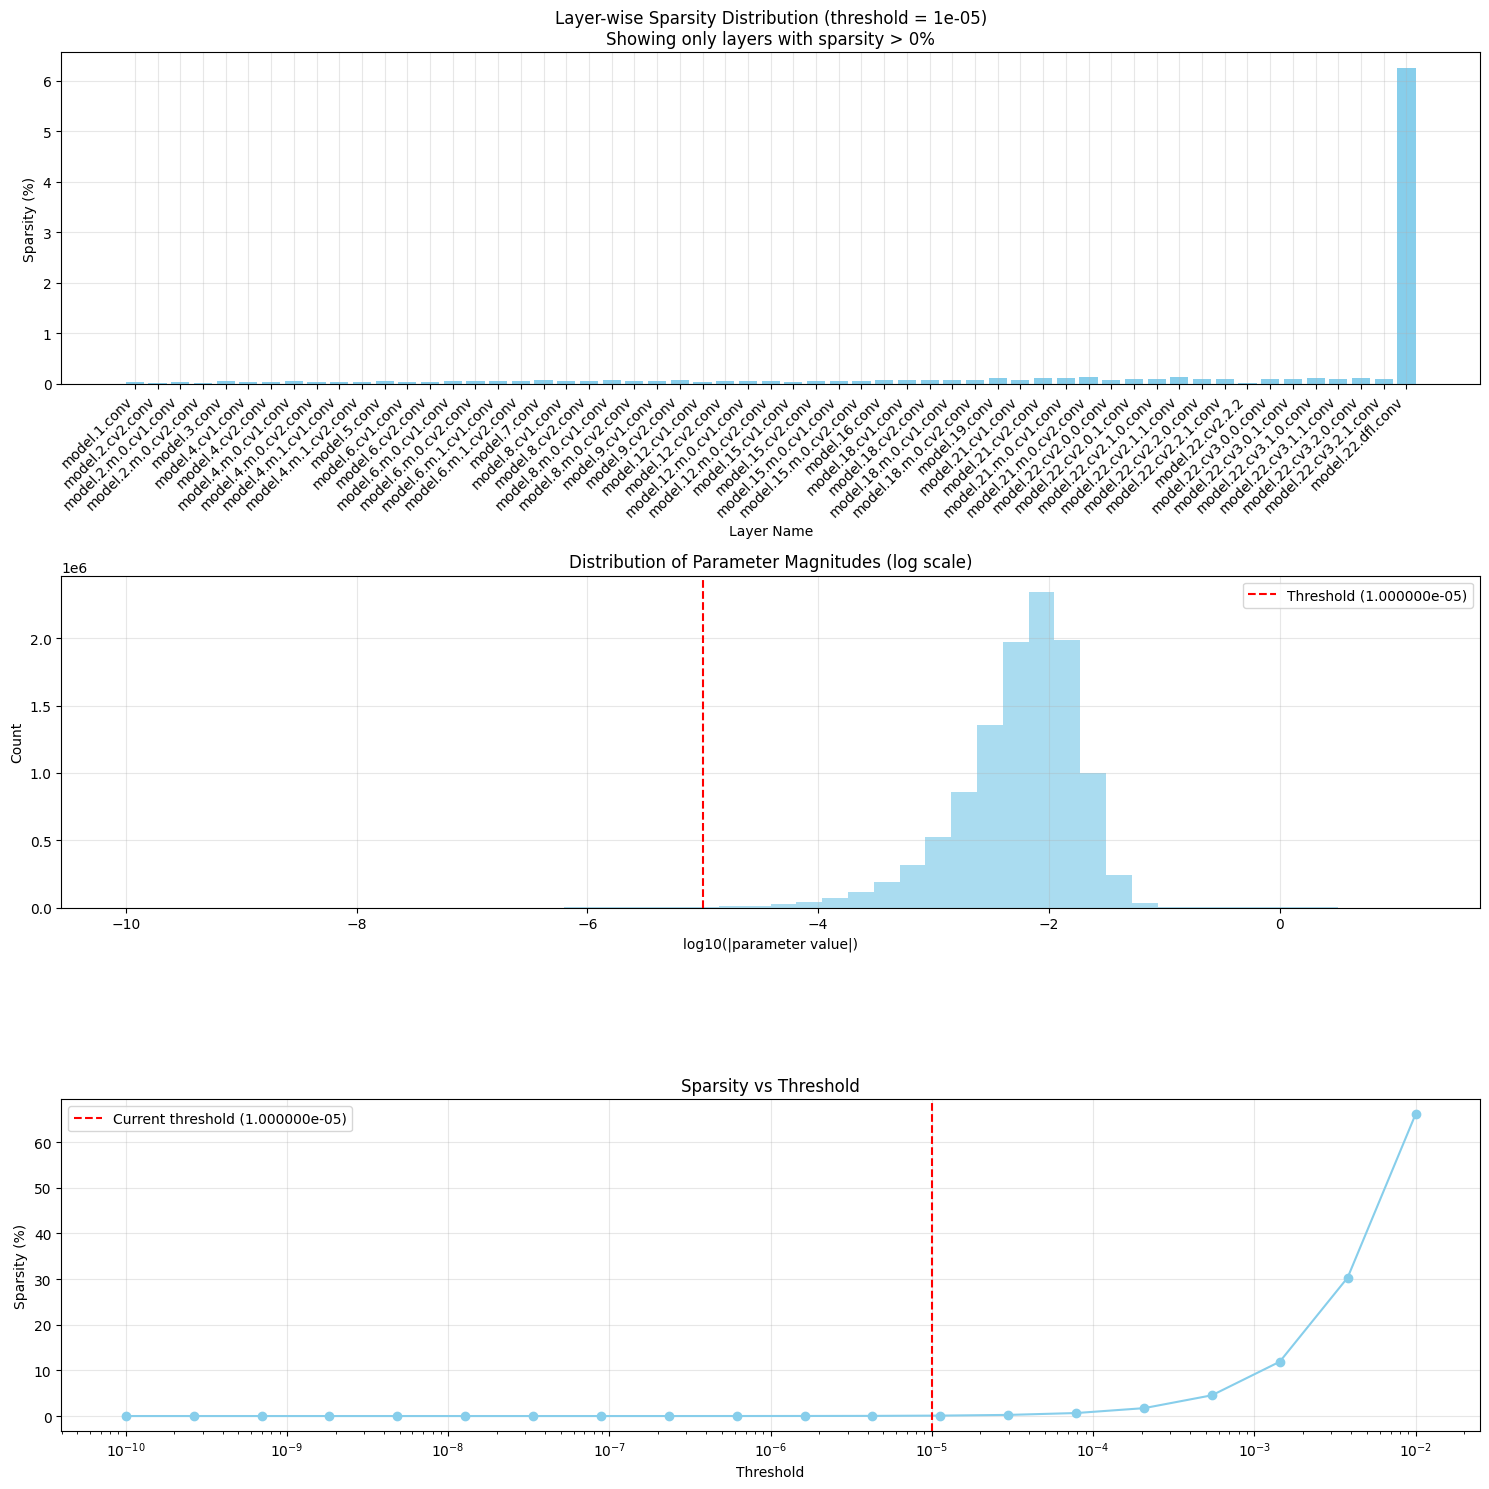

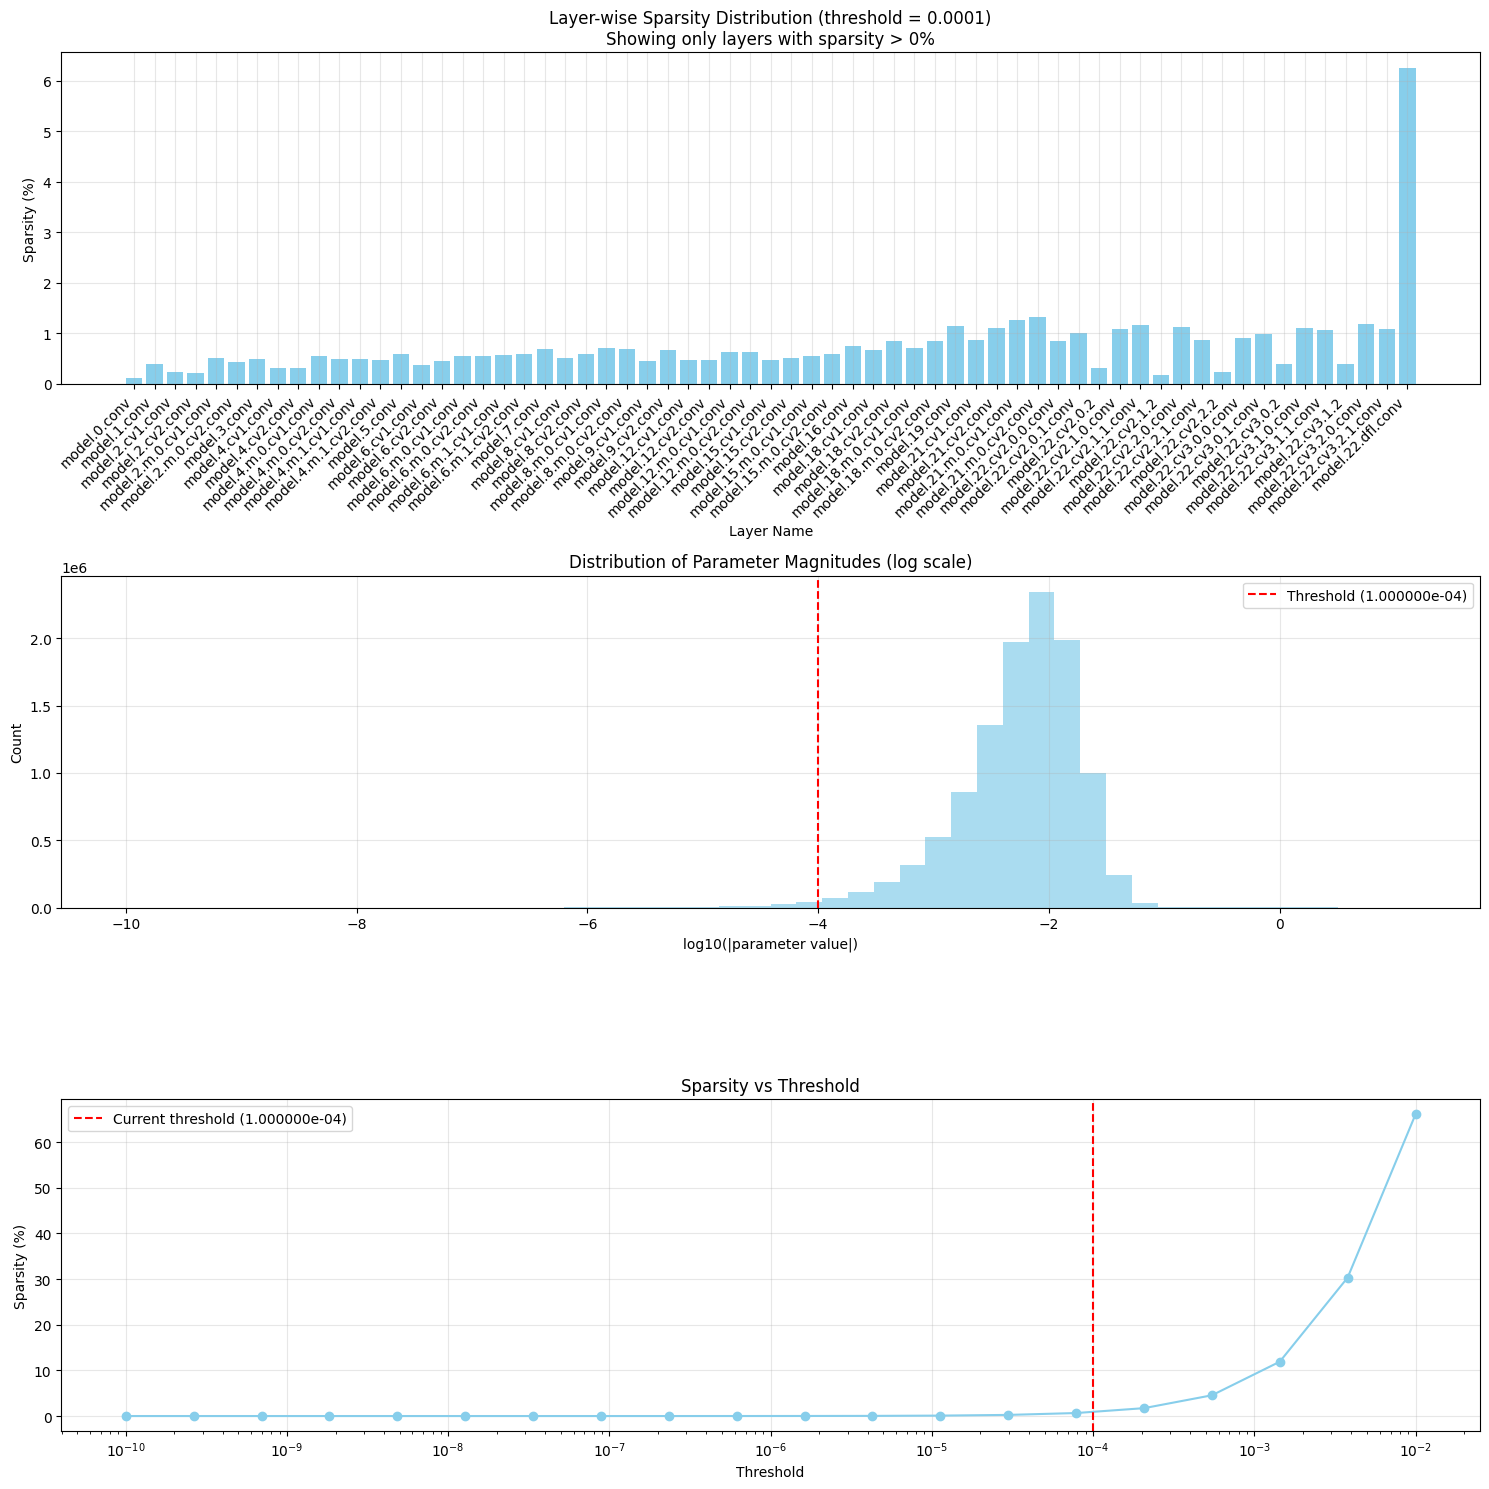

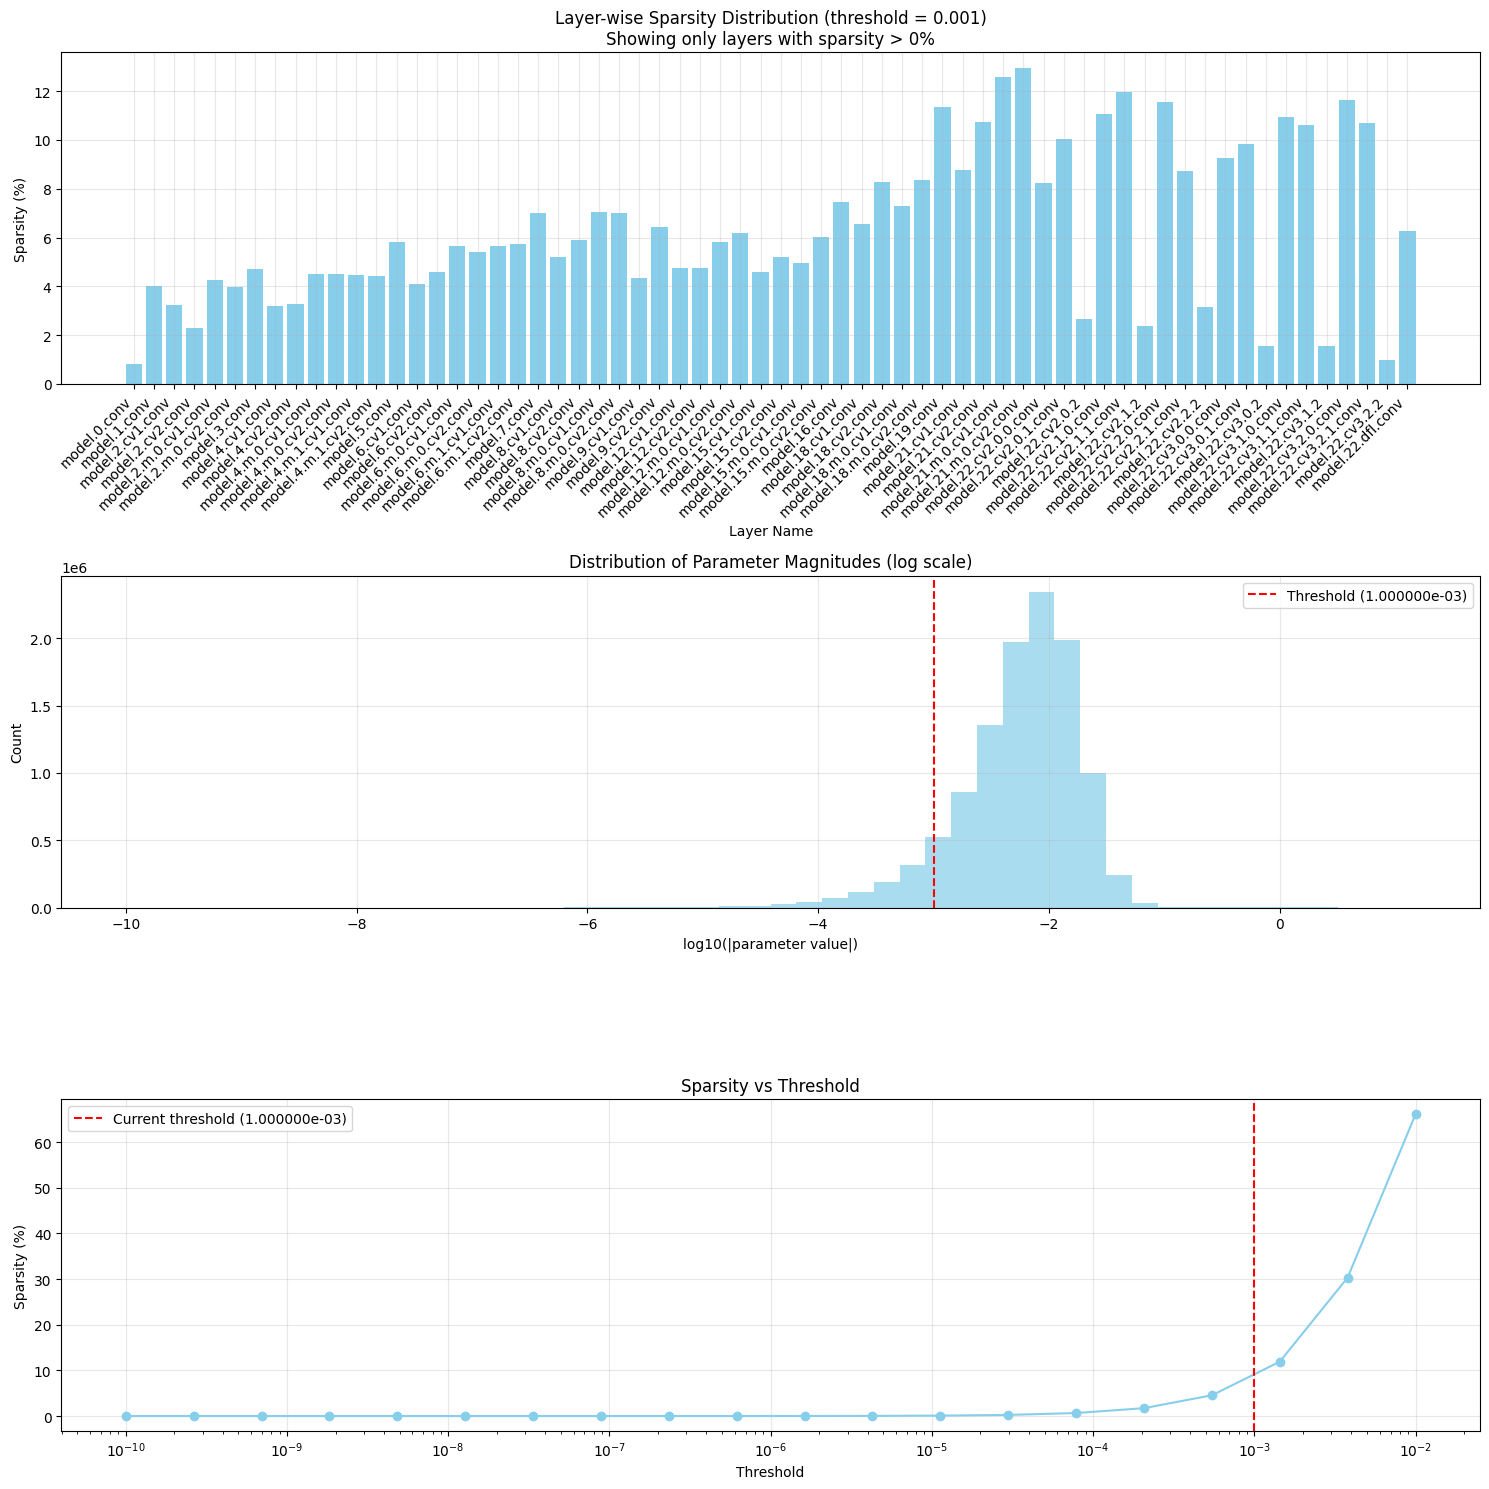

In [24]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ultralytics import YOLO
from collections import OrderedDict

def analyze_model_sparsity(model, threshold=1e-5, plot_threshold_analysis=True):
    """
    Analyzes and visualizes the sparsity of each layer in a YOLO model.
    Only shows layers with non-zero sparsity in the visualization.

    Args:
        model: A YOLO model instance
        threshold: Float value below which parameters are considered effectively zero
        plot_threshold_analysis: Boolean to control whether to plot threshold analysis

    Returns:
        dict: Dictionary containing sparsity metrics
    """
    # Initialize containers for results
    layer_sparsity = OrderedDict()
    total_params = 0
    total_near_zeros = 0

    # Store absolute values of all parameters for threshold analysis
    all_params = []

    # Analyze each layer
    for name, module in model.named_modules():
        if hasattr(module, 'weight') and isinstance(module.weight, torch.Tensor):
            weight = module.weight.detach().cpu().numpy()
            all_params.extend(np.abs(weight.flatten()))

            near_zeros = np.sum(np.abs(weight) < threshold)
            total = weight.size
            sparsity = (near_zeros / total) * 100

            # Only store layers with non-zero sparsity
            if sparsity > 0:
                layer_sparsity[name] = {
                    'sparsity': sparsity,
                    'near_zeros': near_zeros,
                    'total': total,
                    'weight_stats': {
                        'mean': np.mean(np.abs(weight)),
                        'median': np.median(np.abs(weight)),
                        'std': np.std(np.abs(weight))
                    }
                }

            total_params += total
            total_near_zeros += near_zeros

    # Calculate overall sparsity
    overall_sparsity = (total_near_zeros / total_params) * 100

    # Create visualizations only if there are layers with non-zero sparsity
    fig = None
    if layer_sparsity:
        fig = plt.figure(figsize=(15, 15))

        # Layer-wise sparsity bar plot
        plt.subplot(3, 1, 1)
        sparsity_values = [v['sparsity'] for v in layer_sparsity.values()]
        layer_names = list(layer_sparsity.keys())

        plt.bar(range(len(layer_sparsity)), sparsity_values, color='skyblue')
        plt.title(f'Layer-wise Sparsity Distribution (threshold = {threshold})\nShowing only layers with sparsity > 0%')
        plt.xlabel('Layer Name')
        plt.ylabel('Sparsity (%)')
        plt.grid(True, alpha=0.3)
        plt.xticks(range(len(layer_sparsity)), layer_names, rotation=45, ha='right')

        # Weight distribution analysis
        if plot_threshold_analysis:
            plt.subplot(3, 1, 2)
            all_params = np.array(all_params)

            # Plot histogram of parameter magnitudes in log scale
            plt.hist(np.log10(np.abs(all_params) + 1e-10), bins=50, color='skyblue', alpha=0.7)
            plt.axvline(x=np.log10(threshold), color='red', linestyle='--',
                       label=f'Threshold ({threshold:e})')
            plt.title('Distribution of Parameter Magnitudes (log scale)')
            plt.xlabel('log10(|parameter value|)')
            plt.ylabel('Count')
            plt.legend()
            plt.grid(True, alpha=0.3)

            # Calculate sparsity at different thresholds
            thresholds = np.logspace(-10, -2, num=20)
            sparsities = [np.mean(np.abs(all_params) < t) * 100 for t in thresholds]

            plt.subplot(3, 1, 3)
            plt.semilogx(thresholds, sparsities, '-o', color='skyblue')
            plt.axvline(x=threshold, color='red', linestyle='--',
                       label=f'Current threshold ({threshold:e})')
            plt.title('Sparsity vs Threshold')
            plt.xlabel('Threshold')
            plt.ylabel('Sparsity (%)')
            plt.grid(True, alpha=0.3)
            plt.legend()

        plt.tight_layout()

    print(f"\nSparsity Analysis Summary (threshold = {threshold:e}):")
    print(f"Overall Model Sparsity: {overall_sparsity:.2f}%")
    print(f"Total Parameters: {total_params:,}")
    print(f"Parameters Below Threshold: {total_near_zeros:,}")

    return {
        'layer_sparsity': layer_sparsity,
        'overall_sparsity': overall_sparsity,
        'total_params': total_params,
        'total_near_zeros': total_near_zeros,
        'threshold': threshold,
        'figure': fig  # Return the figure object
    }

def main():
    """
    Example usage of the sparsity analysis function
    """
    # Load a YOLO model (you can replace this with your specific model)
    model = YOLO(os.path.join(folder_path, "yolo_results", "yolov8s_finetuned3/weights/best.pt"))

    thresholds = [1e-5, 1e-4, 1e-3]
    for threshold in thresholds:
        print(f"\nAnalyzing with threshold = {threshold:e}")
        metrics = analyze_model_sparsity(model.model, threshold=threshold)

if __name__ == "__main__":
    main()

Based on those results let's 

In [4]:
import torch
import torch.nn.utils.prune as prune
from ultralytics import YOLO
import os

def prune_model(model,amount=0.1):
  for module in model.modules():
    if isinstance(module, torch.nn.Conv2d):
      prune.l1_unstructured(module, name='weight', amount=amount)
      prune.remove(module, 'weight')
  return model

In [ ]:
model = YOLO(os.path.join(folder_path, "yolo_results", "yolov8n_finetuned3/weights/best.pt"))
results = model.val()

print(f"mAP50-95:{results.box.map}")

torch_model = model.model

print(torch_model)

print("Pruning model")
pruned_torch_model = prune_model(torch_model, amount=0.1)
print("Model pruned")

model.model = pruned_torch_model
print("Saving pruned model...")
model.save(os.path.join(folder_path, "yolo_results", "yolov8n_finetuned3.pt"))
print("Pruned model saved")

model = YOLO(os.path.join(folder_path, "yolo_results", "yolov8n_finetuned3.pt"))
results = model.val()

print(f"mAP50-95:{results.box.map}")

torch_model = model.model


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/images/c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


                   all         22        556      0.902      0.948      0.969      0.821
                10baht          6         40      0.987          1      0.995      0.832
                 1baht         15        266      0.966      0.852      0.979      0.806
                 2baht          2         19      0.897      0.947      0.924      0.827
                 5baht          9        231      0.759      0.991      0.979       0.82
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val8
mAP50-95:0.8211656557299232
DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        

val: Scanning /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/valid/images/c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]


                   all         22        556      0.509      0.803      0.672      0.434
                10baht          6         40      0.577       0.95      0.774      0.472
                 1baht         15        266      0.475      0.741      0.666      0.485
                 2baht          2         19      0.726      0.559      0.786      0.553
                 5baht          9        231      0.257      0.961       0.46      0.227
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val9
mAP50-95:0.43399119729205393


Performance loss is tremendous with 10% prune. Let's try to apply a 5% pruning.

In [6]:
from ultralytics import YOLO
model = YOLO("models/yolov8_coinAI.pt")
results = model.val(data="datasets/baht_own_dataset_augmented_merged/data.yaml")
print(f"mAP50-95:{results.box.map}")

torch_model = model.model

print("Pruning model")
pruned_torch_model = prune_model(torch_model, amount=0.05)
print("Model pruned")

model.model = pruned_torch_model
print("Saving pruned model...")
model.save("models/yolov8_coinai_pruned.pt")
print("Pruned model saved")

model = YOLO("models/yolov8_coinai_pruned.pt")
results = model.val(data="datasets/baht_own_dataset_augmented_merged/data.yaml")

print(f"mAP50-95:{results.box.map}")

torch_model = model.model

Ultralytics 8.3.27  Python-3.12.3 torch-2.5.1+cpu CPU (12th Gen Intel Core(TM) i7-1255U)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\romai\OneDrive - De Vinci\Bureau\CoinsAI\datasets\baht_own_dataset_augmented_merged\valid\labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING  C:\Users\romai\OneDrive - De Vinci\Bureau\CoinsAI\datasets\baht_own_dataset_augmented_merged\valid\images\c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.44s/it]


                   all         22        556      0.902      0.948      0.969      0.821
                10baht          6         40      0.987          1      0.995      0.833
                 1baht         15        266      0.966      0.853      0.979      0.806
                 2baht          2         19      0.897      0.947      0.924      0.827
                 5baht          9        231      0.759      0.991      0.979      0.819
Speed: 5.9ms preprocess, 247.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to c:\Users\romai\OneDrive - De Vinci\Bureau\CoinsAI\runs\detect\val41
mAP50-95:0.821147288069391
Pruning model
Model pruned
Saving pruned model...
Pruned model saved
Ultralytics 8.3.27  Python-3.12.3 torch-2.5.1+cpu CPU (12th Gen Intel Core(TM) i7-1255U)


val: Scanning C:\Users\romai\OneDrive - De Vinci\Bureau\CoinsAI\datasets\baht_own_dataset_augmented_merged\valid\labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING  C:\Users\romai\OneDrive - De Vinci\Bureau\CoinsAI\datasets\baht_own_dataset_augmented_merged\valid\images\c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.47s/it]


                   all         22        556      0.906      0.944       0.97      0.822
                10baht          6         40      0.988          1      0.995      0.829
                 1baht         15        266       0.97      0.837      0.979      0.807
                 2baht          2         19      0.895      0.947      0.927       0.83
                 5baht          9        231      0.771      0.991      0.979      0.821
Speed: 5.2ms preprocess, 255.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to c:\Users\romai\OneDrive - De Vinci\Bureau\CoinsAI\runs\detect\val42
mAP50-95:0.8218212789816182


Certainly! Here’s an improved and more concise version:

The model’s overall performance improved slightly despite a 5% pruning, likely due to improved generalization from the removal of less important weights. This pruning also slightly enhances inference time.

In [7]:
model1 = YOLO("models/yolov8_coinAI.pt").model
model2 = YOLO("models/yolov8_coinai_pruned.pt").model

def count_non_null_params(model):
    non_null_params = sum((param != 0).sum().item() for param in model.parameters())
    return non_null_params

non_null_params_model1 = count_non_null_params(model1)
non_null_params_model2 = count_non_null_params(model2)

print(f"Non-null parameters in initial model: {non_null_params_model1}")
print(f"Non-null parameters in prunned model: {non_null_params_model2}")

Non-null parameters in initial model: 11137120
Non-null parameters in prunned model: 10571284


565836 weights have been set to 0 

## Speed performances

This function enables the plotting of pre-processing time, inference time, and post-processing time of a model, allowing to compare the three stages running time and to recorde the average latency. Predictions are made on all images in the given folder.

In [11]:
import os
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

def process_images_in_folder(model, folder_path,agnostic_nms=False):
    """
    Processes images in a folder, makes predictions, and measures processing time.
    """

    # Get the image files in the folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    pre_process_times = []
    inference_times = []
    post_process_times = []

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)

        start_time = time.time()
        img = cv2.imread(image_path)
        pre_process_time = time.time() - start_time
        pre_process_times.append(pre_process_time)

        start_time = time.time()
        results = model(img, agnostic_nms=agnostic_nms)
        inference_time = time.time() - start_time
        inference_times.append(inference_time)

        start_time = time.time()
        annotated_img = results[0].plot()
        post_process_time = time.time() - start_time
        post_process_times.append(post_process_time)

    # Exclude outlier times (e.g., absurdly long or short times)
    def exclude_outliers(times):
        times = np.array(times)
        mean_time = np.mean(times)
        std_dev = np.std(times)
        threshold = 3 * std_dev  # Outliers beyond 3 standard deviations
        return times[(times > mean_time - threshold) & (times < mean_time + threshold)]

    pre_process_times = exclude_outliers(pre_process_times)
    inference_times = exclude_outliers(inference_times)
    post_process_times = exclude_outliers(post_process_times)

    # Calculate and display average times
    avg_pre_process_time = np.mean(pre_process_times)
    avg_inference_time = np.mean(inference_times)
    avg_post_process_time = np.mean(post_process_times)

    print(f"Average loading image latency: {avg_pre_process_time:.4f} seconds")
    print(f"Average model's prediction latency: {avg_inference_time:.4f} seconds")
    print(f"Average ploting result latency: {avg_post_process_time:.4f} seconds")

    # Plotting time taken for each image
    plt.figure(figsize=(12, 6))
    plt.plot(pre_process_times, label='Load image')
    plt.plot(inference_times, label='Model prediction')
    plt.plot(post_process_times, label='Plot results')
    plt.xlabel('Image')
    plt.ylabel('Time (seconds)')
    plt.title('Time taken for each image')
    plt.legend()  # Display legend
    plt.tight_layout()
    plt.show()

Let's run our running time recording function on Google Colab and it's **A100 GPU**.

Model loading time: 0.0759 seconds

0: 640x480 14 1bahts, 12 5bahts, 8.9ms
Speed: 2.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 17 1bahts, 9 5bahts, 10.5ms
Speed: 4.3ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 19 1bahts, 9.7ms
Speed: 3.3ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 19 1bahts, 1 5baht, 8.4ms
Speed: 3.0ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 15 10bahts, 8.4ms
Speed: 3.0ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 19 1bahts, 8.1ms
Speed: 3.0ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 20 1bahts, 8.4ms
Speed: 3.0ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

0: 480x640 19 1bahts, 9.0ms
Speed: 2.8ms preprocess, 9.0

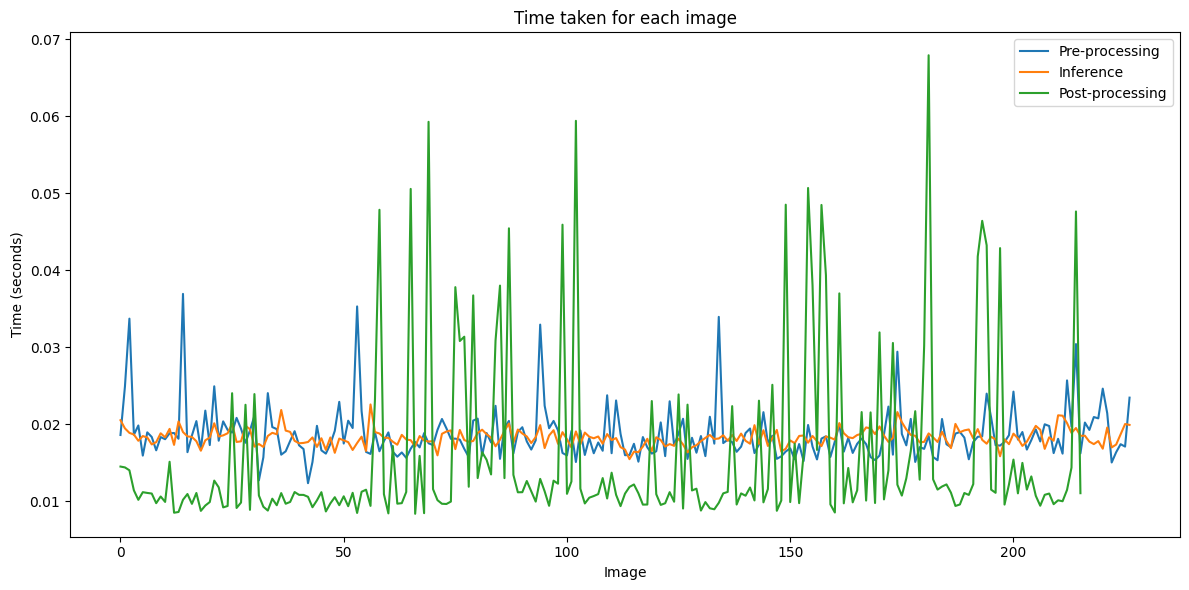

In [ ]:
# Measure time to load the YOLO model
start_time = time.time()
model_path = "/content/drive/MyDrive/CoinAi/yolo_results/yolov8s_finetuned3/weights/best.pt"
folder_path = "/content/drive/MyDrive/CoinAi/baht_own_dataset_augmented_merged/train/images" # Example folder
model = YOLO(model_path)
model_loading_time = time.time() - start_time

print(f"Model loading time: {model_loading_time:.4f} seconds")

# Process images in the folder
process_images_in_folder(model, folder_path)


On this plot pre-processing time does not refer to the time taken by the model’s preprocessing pipeline. Instead, it is the time required to load the image and prepare it for input into the model. Similarly, post-processing time refers to the time needed to plot and display the model’s output results. In this plot inference time refers to the model's latency (pre-processing + post-processing + inference time). I didn't run the script again to correct label in order to save credits but labels will be corrected for the next plot.

Let's run our running time recording function on a laptop and its **Intel® Core™ i7 CPU**.

Model loading time: 0.0639 seconds

0: 640x480 14 1bahts, 12 5bahts, 220.5ms
Speed: 18.3ms preprocess, 220.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 19 1bahts, 5 5bahts, 193.5ms
Speed: 2.3ms preprocess, 193.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 17 1bahts, 9 5bahts, 158.2ms
Speed: 1.7ms preprocess, 158.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 17 1bahts, 9 5bahts, 226.3ms
Speed: 0.0ms preprocess, 226.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 19 1bahts, 191.8ms
Speed: 2.1ms preprocess, 191.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 19 1bahts, 8 5bahts, 191.3ms
Speed: 1.7ms preprocess, 191.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 14 1bahts, 194.8ms
Speed: 1.7ms preprocess, 194.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x48

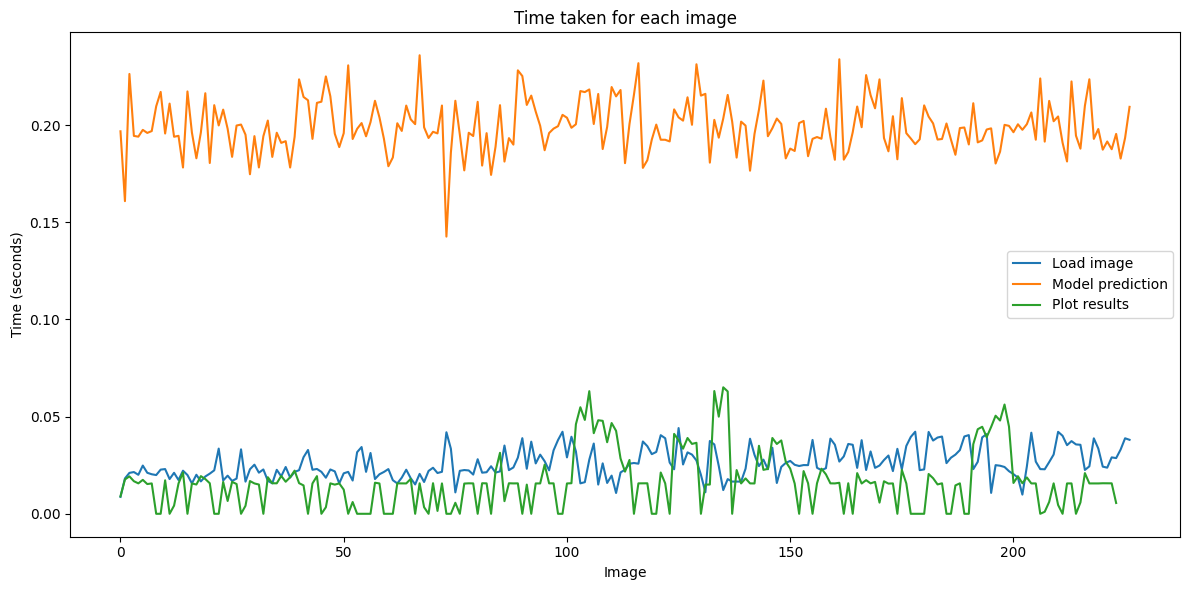

In [12]:
# Measure time to load the YOLO model
start_time = time.time()
model_path = "models/yolov8n_coinai.pt"
folder_path = "datasets/baht_own_dataset_augmented_merged/train/images" # Example folder
model = YOLO(model_path)
model_loading_time = time.time() - start_time

print(f"Model loading time: {model_loading_time:.4f} seconds")

# Process images in the folder
process_images_in_folder(model, folder_path)

The following plots represent the actual pre-processing, inference and post-processing of our model. I made them using the printed speed performance statement and the `Tools.plot_processing_times_from_file()` function.

Let's compare latency :

<div style="text-align: center;">
    <p>A100 GPU</p>
    <img src="report_images/speedA100.png" width="800" height="600" margin="5px">
</div>
<div style="text-align: center;">
    <p>I7 CPU</p>
    <img src="report_images/speedi7.png" width="800" height="600" margin="5px">
</div>

Average Inference time
- A100 : 0.0183 seconds
- I7 :  0.2003 seconds

Our model's latency is 90.8% lower on the A100 GPU compared to the i7 CPU. While this can fluctuate due to factors such as other running programs and RAM speed, these variables can generally be neglected.

These results are insufficient for processing and displaying video in real-time on my laptop, as I can only process roughly 3 frames per second, while at least 24 fps are needed for smooth video playback. However, with an A100 GPU, the computed latency allows for processing 54 frames per second, which is well above the required threshold. In our specific use case, 3 fps is more than adequate.

## Post Processing

### Radius based correction

The model can't measure size as it wasn't designed for it. Moreover, objects are in pixels, and pixel-to-mm conversion can't be conducted without a scale on the image. People can also compare object sizes and deduce that if this coin is worth 5 bahts, then a smaller one should be a 1 baht or 2 baht coin as it is smaller. YOLO can't do such reasoning. We developped `radius_scale_improvement()` function to do a radius-based correction in order to change the prediction of 5 baht coins misclassified as 1 baht. The opposite misclassification is way more rare. In case no 10 baht coin is detected on the image we will use 5 baht one's has scale instead.

Given the fact that our model's classification accuracy for 10 baht coins is almost perfect, we will use their median size to create a pixel-to-mm rescale ratio. This ratio will help us change the prediction of 1 baht coins that are larger than a given threshold to 5 baht coins. The 2 baht coins are too large to use the same algorithm. Normally, we should handle image distortion on the edges, but according to our tests, it wasn't necessary. The pixel-to-mm rescale ratio is based on the dimensions of the best reference coin (10 baht, then 5 baht) with the bounding box dimensions as close as possible to the median and a valid circle detection.

At first we tried to detect all cicles in the image :

![Cicles before bbox restriction](report_images/circles_before_bbox_rest.png?raw=1)

As you can see, this approach is not effective because we only want to detect circles within the predicted bounding boxes. We then restricted the detection to select the largest circle with at least x% of its perimeter included in the bounding box. Setting the correct value for this perimeter is crucial, as it can determine whether the circle is detected and prevent potential misclassification due to oversized radius prediction.

| Image Description | Image |
|-------------------|-------|
| x = 90 | <img src="report_images/circle_detection90.png?raw=1" width="400" height="300">|
| x = 95 | <img src="report_images/circle_detection95.png?raw=1" width="400" height="300">|

As you can see on those two images, predicted circles are way more precise with x=0.95.


<div style="display: flex; flex-wrap: wrap; justify-content: space-around;">
    <div style="text-align: center; width: 45%;">
        <p>Initial Results</p>
        <img src="report_images/raw_prediction.png?raw=1" alt="Before" style="width: 100%; margin: 5px;">
    </div>
    <div style="text-align: center; width: 45%;">
        <p>Processed Results</p>
        <img src="report_images/processed_pred.png?raw=1" alt="After" style="width: 100%; margin: 5px;">
    </div>
</div>


In this example, our radius-based correction successfully reclassified two misidentified 5 baht coin, which were initially classified as 1 baht coins.

### Agnostic NMS

Sometimes, overlapping bounding boxes describe the same object, resulting in a coin being detected twice, as seen in this picture:

![Overlapped predictions](report_images/overlaped_detection.png?raw=1)

In most cases, this is not a problem because overlapping instances of a same classe are removed using non-maximum suppression (NMS). Here is how it works from the the official ultralytics documentation :

1. Score Ranking: All predicted bounding boxes are ranked based on their confidence scores.
2. Selection: The box with the highest confidence score is selected as a positive detection.
3. Overlap Calculation: NMS calculates the Intersection over Union (IoU) for remaining boxes with the selected box. IoU is a metric that measures   the overlap between two bounding boxes learn more about IoU.
4. Suppression: Boxes with an IoU greater than a predefined threshold are considered redundant and are discarded.
Iteration: This process iterates with the next highest score box until all boxes are processed.

However, the issue arises when we detect overlapping bounding boxes on the same coin, each having different classes and high confidence score, which prevents the default NMS to work. It is understandable that the model might perceive two coins, as the borders of some coins are key information for classification, while the rest is nearly identical. This can lead the model to crop and keep both, resulting in two different predicted bounding boxes for the same coin.

In order to prevent that we will use agnostic_nms : "Enables class-agnostic Non-Maximum Suppression (NMS), which merges overlapping boxes of different classes. Useful in multi-class detection scenarios where class overlap is common." (utralytics)

Let's see if model's performance are improved using agnostic NMS

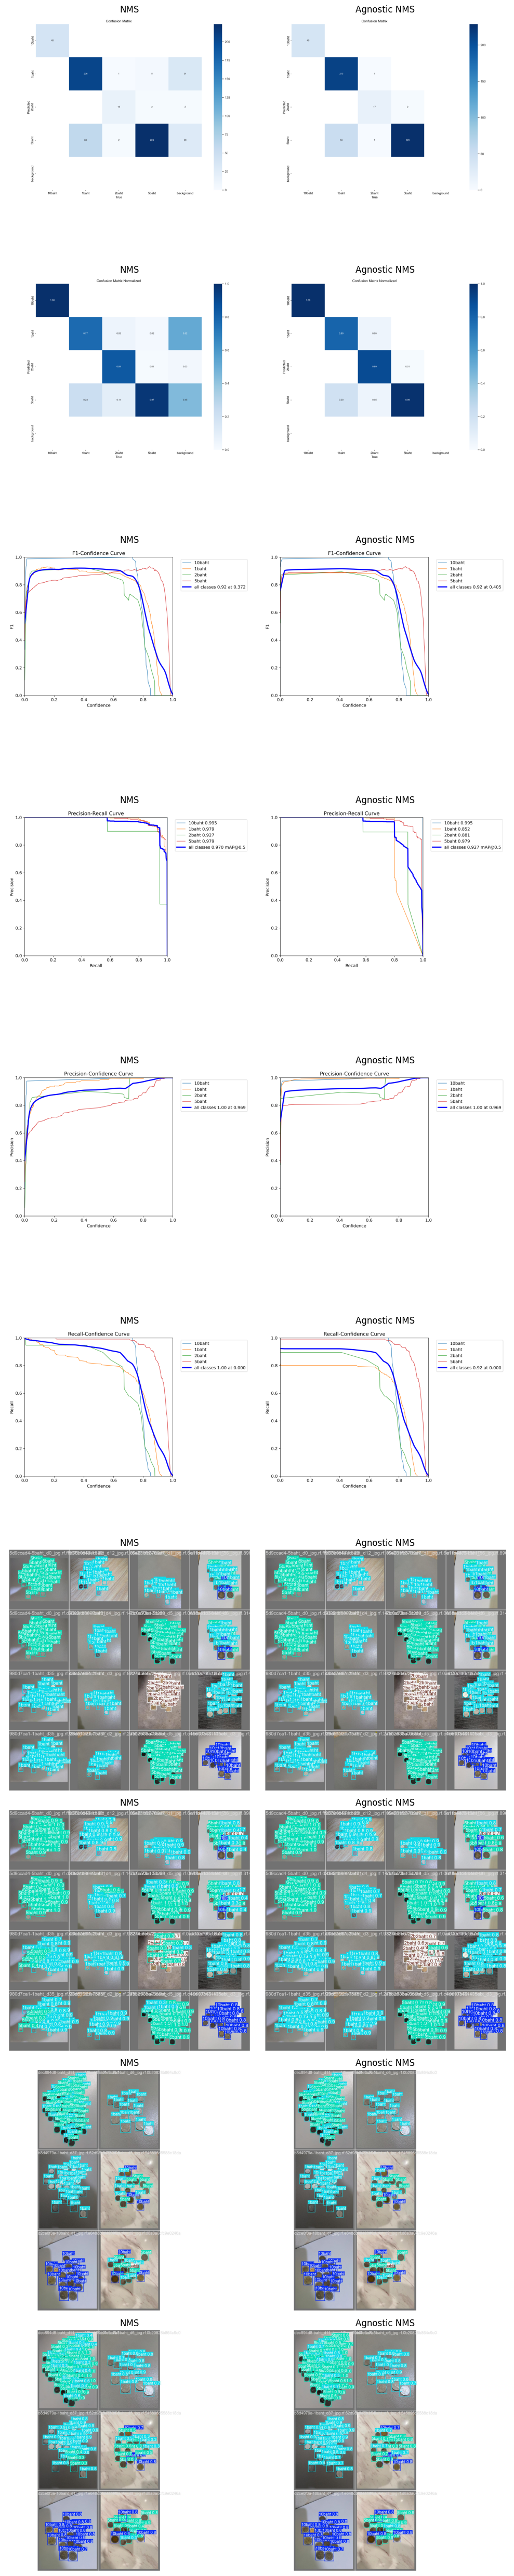

In [26]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def plot_images(nms_folder, agnostic_nms_folder):
    nms_images = [os.path.join(nms_folder, f) for f in os.listdir(nms_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    agnostic_nms_images = [os.path.join(agnostic_nms_folder, f) for f in os.listdir(agnostic_nms_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    num_images = max(len(nms_images), len(agnostic_nms_images))
    fig, axes = plt.subplots(num_images, 2, figsize=(10, 5 * num_images))

    for i in range(num_images):
        if i < len(nms_images):
            nms_image = Image.open(nms_images[i])
            axes[i, 0].imshow(nms_image)
            axes[i, 0].set_title("NMS")
            axes[i, 0].axis("off")
        else:
            axes[i, 0].axis("off")

        if i < len(agnostic_nms_images):
            agnostic_nms_image = Image.open(agnostic_nms_images[i])
            axes[i, 1].imshow(agnostic_nms_image)
            axes[i, 1].set_title("Agnostic NMS")
            axes[i, 1].axis("off")
        else:
            axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()  # Ensure the plot displays only once

# Define the folders containing the images
nms_folder = 'report_images/nms'
agnostic_nms_folder = 'report_images/agnostic_nms'

# Plot the images
plot_images(nms_folder, agnostic_nms_folder)


The results have improved significantly, and background misclassification is now almost nonexistent.

## Conclusion

We began by training all layers of our model, followed by fine-tuning through selectively freezing the backbone and experimenting with different combinations of frozen and unfrozen layers to optimize performance. Once the model plateaued and showed signs of overfitting, we pruned 5% of the weights, which helped enhance generalization.

The model performs well within our specific use case. Further improvements would require a larger dataset, which wasn’t feasible to collect within a reasonable timeframe. The dataset has some limitations, as all images were captured in low-light conditions with the same camera, even though the backgrounds varied. Additionally, Thai baht coins are highly similar in appearance, which explains why the model struggles with images taken from greater distances. At such distances, crucial details are lost when resizing to fit the 640x640 input layer, posing a challenge that can’t be fully resolved with the current setup.

While a larger model with a higher-resolution input layer could potentially mitigate these issues, we couldn’t train one due to computational constraints. 

Here are the specs of our final model : `yolov8_coinai_prod`

performances with agnotic nms activated :

In [27]:
model = YOLO("models/yolov8_coinai_prod.pt")
model.val(data="datasets/baht_own_dataset_augmented_merged/data.yaml", agnostic_nms=True)

Ultralytics 8.3.27  Python-3.12.3 torch-2.5.1+cpu CPU (12th Gen Intel Core(TM) i7-1255U)


val: Scanning C:\Users\romai\OneDrive - De Vinci\Bureau\CoinsAI\datasets\baht_own_dataset_augmented_merged\valid\labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

val: WARNING  C:\Users\romai\OneDrive - De Vinci\Bureau\CoinsAI\datasets\baht_own_dataset_augmented_merged\valid\images\c6440c0b-baht_d9_jpg.rf.d8a3a0cfc9e0246a1a5f8d2ea3e7375c.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.34s/it]


                   all         22        556      0.921      0.922      0.927      0.788
                10baht          6         40      0.989          1      0.995      0.839
                 1baht         15        266      0.994      0.801      0.852        0.7
                 2baht          2         19      0.893      0.895      0.881      0.791
                 5baht          9        231      0.808      0.991      0.979      0.823
Speed: 5.4ms preprocess, 305.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to c:\Users\romai\OneDrive - De Vinci\Bureau\CoinsAI\runs\detect\val50


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000014A008D6C00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       